#                        Air pollution analysis in India

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dt=pd.read_csv('/content/drive/MyDrive/indian_air_pollution_2015_2024.csv')

In [4]:
df=dt.copy()

In [5]:
df.head(2)

,stn_code,date,state,location,agency,type,so2,no2,co,pb,location_monitoring_station,pm_10,pm_2.5
0,AP100000001,20-04-2023,Delhi,Dwarka,IIT Research,Residential,400.03,22.65,334.35,0.67,Dwarka Station 13,20.34,75.04
1,AP100000002,07-10-2018,Punjab,Jalandhar,NEERI,Residential,909.26,22.79,217.87,1.17,Jalandhar Station 16,42.54,117.61


## Features

In [6]:
# Stn_Code : Station code. A code is given to each station that recorded the data.
# Date: The date when the data was recorded.
# State: It represents the states whose air quality data is measured.
# location: It represents the city whose air quality data is measured.
# agency: Name of the agency that measured the data.
# type: The type of area where the measurement was made.
# so2: The amount of Sulphur Dioxide measured.
# no2: The amount of Nitrogen Dioxide measured
# co:  The amount of Carbon Monoxide measured
# pb:  The amount of Lead  measured
# location_monitoring_station: It indicates the location of the monitoring area.
# pm_2.5: It represents the value of particulate matter measured that are 2.5 microns or less in diameter
# pm_10:  It represents the value of particulate matter measured  that is 10 micrometers or less in diameter
# AQI : Air Quality Index


## Data Transformation

### Change Datatypes

In [7]:
df.dtypes

,0
stn_code,object
date,object
state,object
location,object
agency,object
type,object
so2,float64
no2,float64
co,float64
pb,float64


### Drop unnecessary data

In [8]:
df=df.drop(['stn_code','agency','location_monitoring_station' ],axis=1 )

### Handle null value

In [9]:
n=df.isnull().sum()
n=n[n>0]
n

,0


### Handle Duplicate Values

In [10]:
df.duplicated().sum()

np.int64(0)

## Change Datatype

In [11]:
df['date']=pd.to_datetime(df['date'])

### Extract date elements from  Date

In [12]:
df['Year']=df['date'].dt.year
df['Qtr']=df['date'].dt.quarter
df['Qtr']=[f'Qtr {i}' for i in df['Qtr'] ]
df['Month']=df['date'].dt.month_name()
df['Day']=df['date'].dt.day_name()
df['IsWeekend']=np.where(df['Day'].isin(['Saturday','Sunday']),'Weekend','Weekday')
df['Seasons']=np.where(df['Month'].isin(['December','January','February']),'Winter',
            np.where(df['Month'].isin(['March','April']),'Spring',
                    np.where(df['Month'].isin(['May','June','July']),'Summer',
                      np.where(df['Month'].isin(['August','September']),'Rainy','Autumn') )))

### Assigning Region based on State

In [13]:
east_india = ['West Bengal', 'Odisha', 'Jharkhand', 'Bihar', 'Arunachal Pradesh',
              'Assam', 'Meghalaya', 'Nagaland', 'Mizoram']

west_india = ['Maharashtra', 'Gujarat', 'Rajasthan', 'Goa',
              'Dadra & Nagar Haveli','Daman & Diu']

north_india = [ 'Delhi', 'Punjab', 'Haryana', 'Uttarakhand', 'Uttar Pradesh',
    'Himachal Pradesh', 'Jammu & Kashmir', 'Chandigarh', 'Madhya Pradesh',
    'Chhattisgarh']

south_india = ['Telangana', 'Karnataka', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala',
    'Puducherry']

df['region']=np.where(df['state'].isin(east_india),'East',
                     np.where(df['state'].isin(west_india),'West',
                             np.where(df['state'].isin(north_india),'North','South' )))

### Assigning Inland or Costal based on State

In [14]:
Coastal= ['West Bengal', 'Maharashtra', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Kerala', 'Karnataka',
                 'Goa', 'Puducherry', 'Andhra Pradesh', 'Odisha', 'Gujarat', 'Tamil Nadu']
Inland = ['Telangana', 'Chhattisgarh', 'Delhi', 'Punjab', 'Uttarakhand', 'Jharkhand', 'Uttar Pradesh',
                'Madhya Pradesh', 'Rajasthan', 'Himachal Pradesh', 'Jammu & Kashmir', 'Chandigarh', 'Haryana',
                'Nagaland', 'Mizoram', 'Arunachal Pradesh', 'Meghalaya', 'Assam', 'Bihar']

df['In_ct']= np.where(df['state'].isin(Coastal),'Coastal','Inland' )

### Leveling values in 'Type'

In [15]:
df['type']=df['type'].replace({'Residential and others':'Residential','Industrial Areas':'Industrial Area',
                              'Sensitive Areas':'Sensitive Area','Residential ':'Residential',
                              'Residential, Rural and other Areas':'Rural and other Areas'} )

### Assigning AQI Locationwise

In [16]:
aqi_data = {'New Delhi': 169,'Kolkata': 154,'Mumbai': 149,'Bangalore': 139,'Hyderabad': 159,'Chennai': 66, 'Ahmedabad': 126,'Jaipur': 98,
    'Lucknow': 433,'Pune': 161,'Varanasi': 55,'Hubli': 56,'Dwarka': 0,'Jalandhar': 0,
    'Mysore': 0,'Coimbatore': 0,'Howrah': 0,'Nagpur': 0,'Bhopal': 0,'Durgapur': 0,'Vadodara': 0,'Rohini': 0,
    'Kanpur': 0,'Udaipur': 0,'Madurai': 0,'Jodhpur': 0,'Ludhiana': 0,'Amritsar': 0,'Gwalior': 0,'Surat': 0}

df['aqi'] = df['location'].replace(aqi_data)
df['aqi']=pd.to_numeric(df['aqi'], errors='coerce')

In [17]:
df['type'].unique()

array(['Residential', 'Rural and other Areas', 'Sensitive Area',
       'Industrial Area', 'RIRUO'], dtype=object)

### Outliers Treatment

In [18]:
clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']
df[clm].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,5%,50%,95%,98%,99%,max
so2,0.01,15.2299,30.7798,78.3890,800.080,1519.6705,1567.7604,1584.2601,1599.99
no2,0.00,4.0500,8.1198,20.3400,200.920,380.2105,392.1900,396.0600,400.00
co,0.00,3.8400,7.9098,20.0100,200.420,379.9405,392.0400,395.9400,400.00
pb,0.00,0.0400,0.0800,0.2000,2.000,3.7900,3.9200,3.9600,4.00
pm_10,0.00,4.3900,8.7700,21.8500,214.810,408.3300,421.2500,425.7001,430.00
pm_2.5,0.00,2.4300,4.9200,12.5295,124.905,237.4100,244.9800,247.5400,250.00
aqi,0.00,0.0000,0.0000,0.0000,0.000,169.0000,433.0000,433.0000,433.00


In [19]:
for i in clm:
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    iqr=q3-q1
    bmin=q1-(iqr*1.5)
    bmax=q3+(iqr*1.5)
    df[i]=np.where(df[i]>bmax,bmax,df[i])
    df[i]=np.where(df[i]<bmin,bmin,df[i])


In [20]:
df[clm].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,5%,50%,95%,98%,99%,max
so2,0.01,15.2299,30.7798,78.3890,800.080,1519.6705,1567.7604,1584.2601,1599.99
no2,0.00,4.0500,8.1198,20.3400,200.920,380.2105,392.1900,396.0600,400.00
co,0.00,3.8400,7.9098,20.0100,200.420,379.9405,392.0400,395.9400,400.00
pb,0.00,0.0400,0.0800,0.2000,2.000,3.7900,3.9200,3.9600,4.00
pm_10,0.00,4.3900,8.7700,21.8500,214.810,408.3300,421.2500,425.7001,430.00
pm_2.5,0.00,2.4300,4.9200,12.5295,124.905,237.4100,244.9800,247.5400,250.00
aqi,0.00,0.0000,0.0000,0.0000,0.000,169.0000,433.0000,433.0000,433.00


## Analysis

### Analytical Analysis

#### 1. Date & Time-Based Analysis

In [ ]:
# What is the average concentration of PM2.5 for each year?

pm_yr=round(df.groupby(['Year'])[['pm_2.5','pm_10']].mean(),3).T
pm_yr


Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
pm_2.5,124.865,125.360,125.60,124.144,124.929,124.294,124.582,124.696,124.892,125.848
pm_10,213.597,214.669,215.08,217.195,214.787,214.578,214.221,214.965,215.495,215.377


In [ ]:
# How does the AQI concentration vary across different months?
print(' AQI concentration based on different month is : \n')

yt=df.groupby('Month')['aqi'].mean().reset_index()
yt=yt.sort_values('aqi',ascending=False)
yt


 AQI concentration based on different month is : 



,Month,aqi
10,October,56.397118
5,July,56.184688
0,April,56.130892
6,June,55.923405
9,November,55.817463
11,September,55.717739
1,August,55.526744
4,January,55.338150
8,May,55.332905
7,March,55.330861


In [ ]:
# Which month recorded the highest average NO2 levels in the last 5 years

yr=list(df['Year'].unique())
yr.sort(reverse=True)
yr=yr[:5]


print('Yearwise NO2 concentration in month is : \n')
for i in yr:
    y_pm=df[df['Year']==i]
    yt=y_pm.groupby('Month')['no2'].mean().reset_index()

    yt_m=yt['no2'].max()
    ind=yt[yt['no2'] == yt_m].index

    print(f'For Year {i}')
    print(yt['Month'][ind].values,':',yt_m)
    print('\n')


Yearwise NO2 concentration in month is : 

For Year 2024
['November'] : 206.69295143212952


For Year 2023
['December'] : 206.95170584689572


For Year 2022
['December'] : 204.11735191637632


For Year 2021
['May'] : 204.3267880597015


For Year 2020
['March'] : 203.0534166182452




In [ ]:
# What is the pattern (min and max) of SO2 emissions over the last 5 years (monthwise)


y_pm=df[df['Year'].between(2024-5,2024)]
yt=y_pm.groupby('Month')['no2'].mean().reset_index()

yt_mx=yt['no2'].max()
ind_mx=yt[yt['no2'] == yt_mx].index

yt_mn=yt['no2'].min()
ind_mn=yt[yt['no2'] == yt_mn].index


print('Max Value => ',yt['Month'][ind_mx].values,':',yt_mx)
print('Min Value => ',yt['Month'][ind_mn].values,':',yt_mn)
print('Trend Pattern:',yt_mx-yt_mn)
print('\n')


Max Value =>  ['December'] : 202.69336826347305
Min Value =>  ['February'] : 198.62713343480465
Trend Pattern: 4.066234828668399




In [ ]:
# What is the average pollution level (AQI) on weekends vs. weekdays (regionwise)

wk_pm= df.groupby(['region','IsWeekend'])['aqi'].mean()
wk_pm

region  IsWeekend
East    Weekday      50.159390
        Weekend      52.139616
North   Weekday      60.209367
        Weekend      59.328972
South   Weekday      43.654086
        Weekend      43.090334
West    Weekday      59.937011
        Weekend      59.733589
Name: aqi, dtype: float64

In [ ]:
#  How do pollution level CO change seasonwise

pd.pivot_table(data=df,index=['Seasons'],values=['co'],
               aggfunc=['mean'])

,mean
,co
Seasons,
Autumn,200.407719
Rainy,199.954795
Spring,199.762338
Summer,200.233461
Winter,200.493292


In [ ]:
# What is the most polluted season based on average PM10 levels

yr=list(df['Year'].unique())

print(' PM 10 concentration in seasons is maximum in:')
yt=df.groupby('Seasons')['pm_10'].mean().reset_index()

yt_m=yt['pm_10'].max()
ind=yt[yt['pm_10'] == yt_m].index
print(yt['Seasons'][ind].values,':',yt_m)

print('\n')

print(' PM 2.5 concentration in seasons is maximum in: ')
yt=df.groupby('Seasons')['pm_2.5'].mean().reset_index()

yt_m=yt['pm_2.5'].max()
ind=yt[yt['pm_2.5'] == yt_m].index
print(yt['Seasons'][ind].values,':',yt_m)


 PM 10 concentration in seasons is maximum in:
['Winter'] : 215.87957092539227


 PM 2.5 concentration in seasons is maximum in: 
['Rainy'] : 125.26604951723719


In [ ]:
# How do gas related pollution levels vary by quarter (Qtr) over different years

clm=[ 'so2', 'no2', 'co']
df.groupby(['Qtr'])[clm].mean()


,so2,no2,co
Qtr,,,
Qtr 1,798.534263,200.015369,200.578179
Qtr 2,798.747796,200.343182,200.038194
Qtr 3,800.448199,200.577548,199.917398
Qtr 4,800.089976,201.007214,200.276133


In [ ]:
# Which  year ,month,day  has the highest pollution (PB) levels  on average



print('PB concentration is maximum in: \n')

yt=df.groupby(['Year','Month','Day'])['pb'].mean().reset_index()

yt_m=yt['pb'].max()
ind=yt[yt['pb'] == yt_m].index

print('Year :',yt['Year'][ind].values)
print('Month :',yt['Month'][ind].values)
print('Day :',yt['Day'][ind].values)
print('PB :',yt_m)



PB concentration is maximum in: 

Year : [2016]
Month : ['November']
Day : ['Saturday']
PB : 2.2190688259109312


In [ ]:
# Is there a monthly pattern in the increase or decrease of SO2 levels



print('Yearwise SO2 concentration in month is : \n')

yt=df.groupby('Month')['so2'].mean().reset_index()

yt_mx=yt['so2'].max()
ind_mx=yt[yt['so2'] == yt_mx].index

yt_mn=yt['so2'].min()
ind_mn=yt[yt['so2'] == yt_mn].index

print('Max Value => ',yt['Month'][ind_mx].values,':',yt_mx)
print('Min Value => ',yt['Month'][ind_mn].values,':',yt_mn)
print('\n')

Yearwise SO2 concentration in month is : 

Max Value =>  ['September'] : 802.6137261088527
Min Value =>  ['February'] : 796.2043646242078




In [ ]:
# What is the impact of rainy seasons ('so2', 'no2', 'co') on air pollution levels in every year

clm=[  'so2', 'no2', 'co']
df[df['Seasons']=='Rainy'].groupby(['Month'])[clm].mean()

,so2,no2,co
Month,,,
August,797.726205,201.101855,200.442190
September,802.613726,201.298469,199.465123


In [ ]:
# Which quarter experiences the largest increase in pollution (CO) ?


print('Quarter maximum CO concentration in Quarter is :')
yt=df.groupby('Qtr')['co'].mean().reset_index()
yt_mx=yt['co'].max()
ind_mx=yt[yt['co'] == yt_mx].index
print(yt['Qtr'][ind_mx].values,':',yt_mx)
print('\n')

print('Quarter minimum CO concentration in Quarter is :')
yt_mn=yt['co'].min()
ind_mn=yt[yt['co'] == yt_mn].index
print(yt['Qtr'][ind_mn].values,':',yt_mn)
print('\n')



Quarter maximum CO concentration in Quarter is :
['Qtr 1'] : 200.57817883838987


Quarter minimum CO concentration in Quarter is :
['Qtr 3'] : 199.91739775752197




In [ ]:
# How do pollution levels (pm 10) differ between winter and summer months

wn=df[df['Seasons']=='Winter']
sm=df[df['Seasons']=='Summer']

s_wn=wn.groupby('Year')['pm_10'].mean()
s_sm=sm.groupby('Year')['pm_10'].mean()

ws=pd.DataFrame({'Winter':s_wn.values ,'Summer':s_sm.values},index=s_wn.index )
ws['Diff']=ws['Summer']-ws['Winter']
ws=ws.sort_values('Diff',ascending=False)
ws

,Winter,Summer,Diff
Year,,,
2022,214.700336,218.819015,4.118679
2023,214.145022,215.189593,1.044570
2015,212.962538,213.216508,0.253970
2021,216.291668,215.451368,-0.840300
2018,218.058950,216.963970,-1.094980
2020,214.350094,212.704683,-1.645411
2019,217.454877,215.399582,-2.055294
2024,216.759361,213.922332,-2.837029
2017,217.786267,213.994024,-3.792243


In [ ]:
# How does pollution change on 1st and 2nd 1st half

# 1st Half = [Qtr2 and Qtr3]
# 2nd Half = [Qtr1 and Qtr4]

clm=[  'so2', 'no2', 'co', 'pb','pm_10', 'pm_2.5','aqi']

q1=df[df['Qtr'].isin(['Qtr 2','Qtr 3'])]
q2=df[df['Qtr'].isin(['Qtr 1','Qtr 4'])]

print('For Quarter 2 and Quarter 3')
print(q1[clm].mean())
print('\n')

print('For Quarter 4 and Quarter 1')
print(q2[clm].mean())

For Quarter 2 and Quarter 3
so2       799.592140
no2       200.459557
co        199.978212
pb          1.995813
pm_10     214.521152
pm_2.5    125.039087
aqi        55.801751
dtype: float64


For Quarter 4 and Quarter 1
so2       799.312648
no2       200.511628
co        200.427053
pb          2.005035
pm_10     215.474505
pm_2.5    124.800336
aqi        55.372942
dtype: float64


In [ ]:
# Do pollution levels (PM 2.5) tend to increase during the weekend

yr=list(df['Year'].unique())
yr.sort(reverse=True)


wd=df[(df['IsWeekend']=='Weekday')].groupby(['IsWeekend'])['pm_2.5'].mean()
wn=df[(df['IsWeekend']=='Weekend')].groupby(['IsWeekend'])['pm_2.5'].mean()

print('Weekday: ',wd.values)
print('Weekend: ',wn.values)
print('Diff: ',wd.values-wn.values)


if  wd.values<wn.values:
    print('Tends to incresae in Weekend')
else:
    print('Tends to incresae in Weekdays')
print('\n')

Weekday:  [124.89903141]
Weekend:  [124.97085661]
Diff:  [-0.0718252]
Tends to incresae in Weekend




In [ ]:
# Is there a significant difference in SO2 between weekdays and weekends

wd=df[(df['IsWeekend']=='Weekday')].groupby(['IsWeekend'])['so2'].mean()
wn=df[(df['IsWeekend']=='Weekend')].groupby(['IsWeekend'])['so2'].mean()

print('Weekday: ',wd.values)
print('Weekend: ',wn.values)
print('Diff: ',wd.values-wn.values)

if  wd.values<wn.values:
    print('Tends to incresae in Weekend')
else:
    print('Tends to incresae in Weekdays')
print('\n')


Weekday:  [800.62241384]
Weekend:  [796.52590142]
Diff:  [4.09651242]
Tends to incresae in Weekdays




In [ ]:
# Are pollution levels (NO2 ) higher at the start or end of the month


jn=df[(df['Month']=='January')].groupby(['Month'])['no2'].mean()
dc=df[(df['Month']=='December')].groupby(['Month'])['no2'].mean()

print('January: ',jn.values)
print('December: ',dc.values)
print('Diff: ',jn.values-dc.values)

if jn.values>dc.values:
    print('Start Month has high pollution level')
else:
    print('End Month has high pollution level')





January:  [200.72323949]
December:  [201.45876668]
Diff:  [-0.73552719]
End Month has high pollution level




In [ ]:
# Which three months contribute the most to annual co levels in each year

print('Top 3 months contribute the most to annual co levels in each year are: ')

yt_rm=df.groupby(['Month'])['co'].mean()
yt_rm_c=yt_rm.sort_values(ascending=False)[:3]
print(yt_rm_c)


Top 3 months contribute the most to annual co levels in each year are: 
Month
February    200.858826
June        200.651460
November    200.620678
Name: co, dtype: float64


# Start From here


#### 2. State & Location-Based Analysis

In [ ]:
# Which state has the highest average AQI concentration

print('maximum AQI concentration in month is : \n')
yt=df.groupby('state')['aqi'].mean().reset_index()

yt_mx=yt['aqi'].max()
ind_mx=yt[yt['aqi'] == yt_mx].index

print(yt['state'][ind_mx].values,':',yt_mx)


maximum AQI concentration in month is : 

['Uttar Pradesh'] : 162.6171581238868


In [ ]:
# How does air pollution so2 differ between north and south locations


nt=df[(df['region']=='North')].groupby(['region'])['so2'].mean()
st=df[(df['region']=='South')].groupby(['region'])['so2'].mean()

print('North: ',nt.values)
print('South: ',st.values)
print('Diff: ',nt.values-st.values)

if nt.values>st.values:
    print('North has high SO2 level')
else:
    print('South has high SO2 level')

print('\n')


North:  [797.95549223]
South:  [798.81733735]
Diff:  [-0.86184511]
South has high SO2 level




In [ ]:
# What are the top 5 most polluted (PM 10 )locations over the past decade



print('Top 5 Location contribute the most to annual PM 10 levels in each year are: ')

yt_rm=df.groupby(['state','location'])['pm_10'].mean()
yt_rm_c=yt_rm.sort_values(ascending=False)[:5]
yt_rm_c


Top 5 Location contribute the most to annual PM 10 levels in each year are: 


state      location 
Punjab     Amritsar     217.644558
Rajasthan  Jodhpur      217.413916
Gujarat    Surat        217.013172
           Vadodara     216.927328
Delhi      New Delhi    216.619194
Name: pm_10, dtype: float64

In [ ]:
# Which states show the largest improvement and Lowest improvement (PM 2.5) in air quality

st=df.groupby(['state'])['pm_2.5'].mean()
st=st.sort_values()

print('Largest improvement => ',st.index[0],': ',st.values[0])
print('Lowest Improvement => ',st.index[-1],': ',st.values[-1])



Largest improvement =>  Gujarat :  124.08391200119861
Lowest Improvement =>  Tamil Nadu :  125.76538699533374


In [ ]:
# How do pollution levels (pb) differ between coastal and inland states


ct=df[(df['In_ct']=='Coastal')].groupby(['In_ct'])['pb'].mean()
il=df[(df['In_ct']=='Inland')].groupby(['In_ct'])['pb'].mean()


print('Central: ',ct.values)
print('Inland: ',il.values,'\n')
print('Diff: ',il.values-ct.values)



Central:  [1.99712176]
Inland:  [2.00372333] 

Diff:  [0.00660156]


In [ ]:
# What is the  statewise  maximum pollution pollutants

clm=['pm_10', 'pm_2.5','aqi']
df.groupby('state')[clm].max().sort_values('aqi',ascending=False)

,pm_10,pm_2.5,aqi
state,,,
Uttar Pradesh,430.00,249.99,433.0
Delhi,430.00,250.00,169.0
Maharashtra,429.99,250.00,161.0
West Bengal,429.96,249.99,154.0
Karnataka,429.95,249.99,139.0
Gujarat,429.98,249.99,126.0
Rajasthan,429.99,250.00,98.0
Tamil Nadu,429.94,249.99,66.0
Madhya Pradesh,429.99,249.99,0.0


In [ ]:
# Which location has shown the highest increase in NO2 levels in the last 5 years

yt_n= df.groupby(['location','state'])['no2'].mean().reset_index()

yt_mx=yt_n['no2'].max()
ind_mx=yt_n[yt_n['no2'] == yt_mx].index

print('State/UT: ',yt_n['state'][ind_mx].values)
print('Location: ',yt_n['location'][ind_mx].values)
print('NO2: ',yt_mx )


State/UT:  ['West Bengal']
Location:  ['Howrah']
NO2:  202.50473087818696


In [ ]:
# Which state has the most and least  air pollution levels (co) over time

yt_n= df.groupby(['state'])['co'].mean().reset_index()

yt_mx=yt_n['co'].max()
ind_mx=yt_n[yt_n['co'] == yt_mx].index

yt_mn=yt_n['co'].min()
ind_mn=yt_n[yt_n['co'] == yt_mn].index


print('Maximum => ')
print('State/UT: ',yt_n['state'][ind_mx].values)
print('co: ',yt_mx )

print('\n')

print('Minimum => ')
print('State/UT: ',yt_n['state'][ind_mn].values)
print('co: ',yt_mn )


Maximum => 
State/UT:  ['Maharashtra']
co:  200.86378298086606


Minimum => 
State/UT:  ['Uttar Pradesh']
co:  199.5618172372848


In [ ]:
# How does the pollution type (PM 10) vary between locations

yt_n= df.groupby(['location','state'])['pm_10'].mean().reset_index()

yt_mx=yt_n['pm_10'].max()
ind_mx=yt_n[yt_n['pm_10'] == yt_mx].index

yt_mn=yt_n['pm_10'].min()
ind_mn=yt_n[yt_n['pm_10'] == yt_mn].index

print('Maximum => ')
print('State/UT: ',yt_n['state'][ind_mx].values[0])
print('Location: ',yt_n['location'][ind_mx].values[0])
print('PM 10: ',yt_mx )

print('\n')

print('Minimum => ')
print('State/UT: ',yt_n['state'][ind_mn].values[0])
print('Location: ',yt_n['location'][ind_mn].values[0])
print('PM 10: ',yt_mn )
print('Difference:',yt_mx-yt_mn)



Maximum => 
State/UT:  Punjab
Location:  Amritsar
PM 10:  217.64455825097335


Minimum => 
State/UT:  Maharashtra
Location:  Nagpur
PM 10:  212.78108485499465
Difference: 4.863473395978701


In [ ]:
# What are the top 3 cleanest locations in terms of average PM2.5 levels?

yt_n= df.groupby(['location','state'])['pm_2.5'].mean().reset_index()
yt_mn=yt_n.sort_values(['pm_2.5'])

yt_mn[:5]



,location,state,pm_2.5
28,Vadodara,Gujarat,122.470367
27,Udaipur,Rajasthan,123.325150
7,Dwarka,Delhi,123.760503
8,Gwalior,Madhya Pradesh,123.776924
17,Lucknow,Uttar Pradesh,123.888036


In [ ]:
# Which states have the highest variation in pollution

yt_n= df.groupby(['state'])[['pm_10','pm_2.5','pb','aqi']].mean()

y_st=yt_n.sort_values(by=clm,ascending=False)
print('State    ',y_st.index[0])
print(y_st.iloc[0])




State     Gujarat
pm_10     216.551940
pm_2.5    124.083912
pb          1.996186
aqi        42.897768
Name: Gujarat, dtype: float64


In [ ]:
# How does pollution (aqi) compare between capital cities (Delhi) and other state

yt_n= df.groupby(['state'])['aqi'].mean()

yt_s=yt_n['Delhi']-yt_n
yts=yt_s.sort_values(ascending=False)
print(yts)


state
Madhya Pradesh     56.409277
Punjab             56.409277
Tamil Nadu         34.241900
Rajasthan          23.681757
Gujarat            13.511509
West Bengal         5.687055
Delhi               0.000000
Karnataka          -8.105323
Maharashtra       -47.742737
Uttar Pradesh    -106.207881
Name: aqi, dtype: float64


In [ ]:
# What are the top polluted regions for each specific pollutant


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']


yt_s=df.groupby('region')[clm].mean()
yts=yt_s.sort_values(by=clm,ascending=False)
print('Region =>  ',yts.index[0])
print(yts.iloc[0])
print('\n')


Region =>   West
so2       802.086261
no2       199.887006
co        200.467743
pb          2.001884
pm_10     215.291141
pm_2.5    124.651316
aqi        59.878400
Name: West, dtype: float64




In [ ]:
# . How does pollution in industrial zones compare to sensitive zones


ia=df[(df['type']=='Industrial Area')].groupby(['type'])['so2'].mean()
ra=df[(df['type']=='Sensitive Area')].groupby(['type'])['so2'].mean()

print('Industrial Area: ',ia.values)
print('Sensitive Area: ',ra.values)
print('Diff: ',ia.values-ra.values)

if ia.values>ra.values:
    print('Industrial Area is highest')
else:
    print('Sensitive Area is highest')


Industrial Area:  [796.19234301]
Sensitive Area:  [800.23479151]
Diff:  [-4.04244851]
Sensitive Area is highest


In [ ]:
# How do pollution levels (NO2) compare between summer vs. winter season in different year

ia=df[(df['Seasons']=='Winter')].groupby(['Seasons'])['no2'].mean()
ra=df[(df['Seasons']=='Rainy')].groupby(['Seasons'])['no2'].mean()

print('Winter Season: ',ia.values)
print('Summer Season: ',ra.values)
print('Diff: ',ia.values-ra.values)



Winter Season:  [200.3170371]
Summer Season:  [201.19993281]
Diff:  [-0.8828957]


In [ ]:
# Are there states where pollution levels (co) are consistently abovw the national average?

yt_s=df.groupby(['state'])['co'].mean()

yts= yt_s[yt_s.mean()<yt_s]
print('National co level: ',yt_s.mean())
print(yts)
print('\n')


National co level:  200.205336514035
state
Karnataka      200.392379
Maharashtra    200.863783
Punjab         200.451707
Rajasthan      200.602473
Tamil Nadu     200.519720
Name: co, dtype: float64




#### 3. Pollutant-Specific Analysis

In [ ]:
# What is the trend of SO2 levels in the past 6 years

yt=df[df['Year'].between(2024-6,2024) ]


print('Max SO2:',yt['so2'].max() )
print('Min SO2:',yt['so2'].min() )
print('Avg SO2:',yt['so2'].mean() )

print('\n')

print('Diff:',yt['so2'].max()-yt['so2'].min())



Max SO2: 1599.99
Min SO2: 0.01
Avg SO2: 798.3245352753167


Diff: 1599.98


In [ ]:
# Which zone(statewise) has shown the most drastic increase of PM 2.5 over time


y_st=df.groupby(['state','type'])['pm_2.5'].mean().reset_index()

y_mx=y_st['pm_2.5'].max()
ind_mx=y_st[y_st['pm_2.5']==y_mx].index

print('Zone: ',y_st['type'][ind_mx].values.tolist())
print('State: ',y_st['state'][ind_mx].values[0])
print('PM 2.5 level: ',y_mx)
print('\n')



Zone:  ['Industrial Area']
State:  Punjab
PM 2.5 level:  127.10902740138513




In [ ]:
# Which state is the biggest contributor to overall air quality deterioration?

clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

y_st=df.groupby(['state'])[clm].mean().reset_index()

yst=y_st.sort_values(by=clm,ascending=False)
print(yst.iloc[0])
print('\n')


state     Maharashtra
so2        805.712563
no2        199.380807
co         200.863783
pb           2.001962
pm_10      214.578006
pm_2.5     124.933746
aqi        104.152014
Name: 4, dtype: object




In [ ]:
# How does NO2 concentration vary across different seasons of the year regionwise


y_st=pd.pivot_table(data=df,columns='Seasons',index='region',
                        values='no2',aggfunc='mean')
y_st


Seasons,Autumn,Rainy,Spring,Summer,Winter
region,,,,,
East,202.880936,202.878993,198.142326,203.287127,201.056142
North,200.900961,200.564950,201.641612,199.130344,200.240377
South,201.967410,201.272976,200.690415,201.409605,199.913562
West,199.114031,201.433056,199.171777,199.302761,200.438896


In [ ]:
# What is the minimal pollutant value accross different region

clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

y_st=pd.pivot_table(data=yt,index='region',
                        values=clm,aggfunc='min')

y_st


,aqi,co,no2,pb,pm_10,pm_2.5,so2
region,,,,,,,
East,0.0,0.02,0.00,0.0,0.07,0.01,0.11
North,0.0,0.00,0.01,0.0,0.00,0.01,0.01
South,0.0,0.02,0.01,0.0,0.01,0.01,0.12
West,0.0,0.00,0.01,0.0,0.00,0.01,0.02


In [ ]:
# How do (SO2 & NO2),(pb & co),(PM 10 & PM 2.5) levels correlate with each other?


crr_sn=df[['so2','no2']].corr()
crr_sr=df[['pb','co']].corr()
crr_pm=df[['pm_10','pm_2.5']].corr()

print('Corr for (SO2 & NO2): \n',crr_sn)
print('\n')

print('Corr for (pb & co): \n',crr_sr)
print('\n')

print('Corr for (PM 10 & PM ): \n',crr_pm)
print('\n')



Corr for (SO2 & NO2): 
           so2       no2
so2  1.000000 -0.002773
no2 -0.002773  1.000000


Corr for (pb & co): 
           pb        co
pb  1.000000 -0.002325
co -0.002325  1.000000


Corr for (PM 10 & PM ): 
           pm_10   pm_2.5
pm_10   1.00000 -0.00135
pm_2.5 -0.00135  1.00000




In [ ]:
# How does PM2.5 compare to PM10 in different location and which is maximum


y_st=df.groupby(['state','location'])[['pm_10','pm_2.5']].mean().reset_index()

yst=y_st.sort_values(['pm_10','pm_2.5'],ascending=False)
print(yst.max())
print('\n')

state       West Bengal
location       Varanasi
pm_10        217.644558
pm_2.5       127.109027
dtype: object




In [ ]:
# What is the zonewise maximum recorded value for SO2 pollutant, in which state


y_st=df.groupby(['state','type'])['so2'].mean().reset_index()

y_mx=y_st['so2'].max()
ind_mx=y_st[y_st['so2']==y_mx].index

print('Zone: ',y_st['type'][ind_mx].values.tolist())
print('State: ',y_st['state'][ind_mx].values.tolist()[0])
print('PM 2.5 level: ',y_mx)




Zone:  ['Sensitive Area']
State:  Gujarat
PM 2.5 level:  812.3904880294659


In [ ]:
# Which state peaks in Autumn compared to Spring for pb


wn=df[(df['Seasons']=='Autumn')].groupby(['state'])['pb'].mean().reset_index()
sm=df[(df['Seasons']=='Spring')].groupby(['state'])['pb'].mean().reset_index()

wn_mx=wn['pb'].max()
ind_wnmx=wn[wn['pb']==wn_mx].index

sm_mx=sm['pb'].max()
ind_smmx=sm[sm['pb']==sm_mx].index


print('In Autumn => ')
print('State: ',y_st['state'][ind_wnmx].values.tolist()[0])
print('pb level: ',wn_mx)

print('\n')

print('In Spring => ')
print('State: ',y_st['state'][ind_smmx].values.tolist()[0])
print('pb level: ',sm_mx)





In Autumn => 
State:  Karnataka
pb level:  2.017034901365706


In Spring => 
State:  Karnataka
pb level:  2.032377938517179


In [ ]:
# What is the minimum (PM10,PM2.5) and (pb,co) levels ( state and seasonwise)

cl=[ 'co', 'pb', 'pm_10', 'pm_2.5']
y_st=df.groupby(['state','Seasons'])[cl].mean().reset_index().min()

print(y_st)




state           Delhi
Seasons        Autumn
co         196.682447
pb           1.954902
pm_10      211.074662
pm_2.5     122.393337
dtype: object


In [ ]:
# How do PM2.5 and PM10 levels change zonewise before and after a major rainfall event

ss=df[(df['Seasons']=='Spring')|(df['Seasons']=='Summer')].groupby('type')[['pm_2.5','pm_10']].mean()
aw=df[(df['Seasons']=='Autumn')|(df['Seasons']=='Winter')].groupby('type')[['pm_2.5','pm_10']].mean()


print('Pre Rainy Day: \n',ss,'\n')
print('Post Rainy Day: \n',aw)


Pre Rainy Day: 
                            pm_2.5       pm_10
type                                         
Industrial Area        124.759611  215.406123
RIRUO                  124.203355  214.224612
Residential            125.308414  214.586517
Rural and other Areas  125.840171  215.422762
Sensitive Area         124.758372  214.600301 

Post Rainy Day: 
                            pm_2.5       pm_10
type                                         
Industrial Area        125.299977  215.690614
RIRUO                  123.244531  213.829803
Residential            124.462214  215.448219
Rural and other Areas  126.369721  215.737112
Sensitive Area         124.243033  215.568226


In [ ]:
# Which Quarter show a drastic increase of pollution level , along with region


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']


qr=pd.pivot_table(data=df,index=['region','Qtr'],values=clm,aggfunc='mean').reset_index()

print(qr.max())




region          West
Qtr            Qtr 4
aqi        60.851987
co        201.645594
no2       203.268964
pb          2.021886
pm_10     215.889445
pm_2.5    126.880521
so2       805.545023
dtype: object


In [ ]:
# How does air pollution vary near industrial zones vs. non industrial zone, Quarterwise


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

i_st=df[(df['type']=='Industrial Area')]
ni_st=df[(df['type']!='Industrial Area')]

print('Industrial Area => ')
print(i_st[clm].mean(),'\n')
print('Non-Industrial Area => ')
print(ni_st[clm].mean())
print('\n')


Industrial Area => 
so2       796.192343
no2       199.795064
co        199.422207
pb          1.998340
pm_10     215.190321
pm_2.5    125.112525
aqi        34.430119
dtype: float64 

Non-Industrial Area => 
so2       800.649145
no2       200.739187
co        200.489603
pb          2.001198
pm_10     214.928036
pm_2.5    124.848693
aqi        63.729343
dtype: float64




In [ ]:
# Which state is responsible for the highest air quality index

clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']


y_st=df.groupby('state')[clm].mean().reset_index().min()

print(y_st)


state          Delhi
so2         794.0431
no2       199.375097
co        199.561817
pb          1.985921
pm_10     213.976101
pm_2.5    124.083912
aqi              0.0
dtype: object


In [ ]:
# How does air pollution (pb and co) behave during spring and autumn season


cl=['pm_10','pm_2.5','pb','co']


ss=df[(df['Seasons']=='Spring')].groupby('type')[['pb','co']].mean()
aw=df[(df['Seasons']=='Autumn')].groupby('type')[['pb','co']].mean()


print('In Spring: \n',ss,'\n')
print('In Autumn: \n',aw)
print('\n')

In Spring: 
                              pb          co
type                                       
Industrial Area        2.009984  197.469617
RIRUO                  2.050219  200.972850
Residential            2.008907  200.306443
Rural and other Areas  1.996570  200.738412
Sensitive Area         1.977649  201.043329 

In Autumn: 
                              pb          co
type                                       
Industrial Area        1.992405  199.426070
RIRUO                  1.992256  200.003058
Residential            2.017701  201.699436
Rural and other Areas  2.007476  199.576207
Sensitive Area         1.975379  199.498929




In [ ]:
# Are there locations where  SO2 and NO2 levels are higher (mention its state)


y_st=df.groupby(['location','type'])[['so2','no2']].mean().reset_index().max()

print(y_st)




location          Varanasi
type        Sensitive Area
so2             812.390488
no2             202.504731
dtype: object


#### 4. Comparative & Anomaly Detection

In [ ]:
# Are pollution levels more stable or erratic across different locations, which one

clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']


y_st=df.groupby(['location'])[clm].mean().reset_index().min()

print(y_st)


location     Ahmedabad
so2         786.722328
no2         198.062892
co          197.929424
pb            1.961996
pm_10       212.781085
pm_2.5      122.470367
aqi                0.0
dtype: object


In [ ]:
# Identify the top 10 highest particle spikes recorded in history , with state


clm=[ 'pm_10', 'pm_2.5']

y_st=df.groupby(['location','state'])[clm].mean().reset_index()
print(y_st.sort_values(by=clm,ascending=False).iloc[:10])


      location           state       pm_10      pm_2.5
1     Amritsar          Punjab  217.644558  124.126589
14     Jodhpur       Rajasthan  217.413916  126.445047
26       Surat         Gujarat  217.013172  124.389378
28    Vadodara         Gujarat  216.927328  122.470367
23   New Delhi           Delhi  216.619194  124.963107
6     Durgapur     West Bengal  216.132952  124.223596
7       Dwarka           Delhi  216.096017  123.760503
24        Pune     Maharashtra  215.931435  125.341906
5   Coimbatore      Tamil Nadu  215.788988  125.602157
3       Bhopal  Madhya Pradesh  215.770536  125.163423


In [ ]:
# Which State  pollution levels (NO2) exceed mean threshold


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5']


y_st=df.groupby(['state'])['no2'].mean()
yst=y_st[y_st>y_st.mean()].sort_values(ascending=False)

print('Threshold: ',y_st.mean())
print(yst)


Threshold:  200.48536793725484
state
West Bengal       201.748907
Karnataka         201.007756
Tamil Nadu        200.977048
Rajasthan         200.909212
Madhya Pradesh    200.888520
Name: no2, dtype: float64


In [ ]:
# At which month  is the biggest air pollution event recorded


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

y_st=df.groupby(['Month'])[clm].mean().reset_index().max()

print(y_st)



Month      September
so2       802.613726
no2       201.833874
co        200.858826
pb          2.013034
pm_10     216.801676
pm_2.5    125.628115
aqi        56.397118
dtype: object


In [ ]:
# Are there days of the year when pollution always peaks


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

y_st=df.groupby(['Day'])[clm].mean().reset_index().max()

print(y_st)



Day        Wednesday
so2       803.158234
no2       201.197475
co        201.837782
pb          2.009274
pm_10      215.69668
pm_2.5    125.537618
aqi        56.301726
dtype: object


In [ ]:
# Compare min and max air pollution levels (PM 10) between two locations


y_st=df.groupby(['location','state'])[['pm_10','pm_2.5']].mean().reset_index()


print('Maximum Value =>')
print(y_st.max(),'\n')
print('Minimum Value =>')
print(y_st.min(),'\n')

print('PM 10 Diff:',y_st.max()['pm_10']-y_st.min()['pm_10'])
print('PM 2.5 Diff:',y_st.max()['pm_2.5']-y_st.min()['pm_2.5'])
print('\n')


Maximum Value =>
location       Varanasi
state       West Bengal
pm_10        217.644558
pm_2.5       127.109027
dtype: object 

Minimum Value =>
location     Ahmedabad
state            Delhi
pm_10       212.781085
pm_2.5      122.470367
dtype: object 

PM 10 Diff: 4.863473395978701
PM 2.5 Diff: 4.638660611943749




In [ ]:
# Identify Quarterwise days with low pollution  over the past 5 years

clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']


y_st=df.groupby(['Day','Qtr'])[clm].mean().reset_index().min()

print(y_st)



Day           Friday
Qtr            Qtr 1
so2       788.475718
no2       198.033427
co        197.053513
pb           1.97295
pm_10     213.290162
pm_2.5    122.933199
aqi        54.008744
dtype: object


In [ ]:
# Identify states where pollution control measures have worked best


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']


y_st=df.groupby(['state'])[clm].mean().reset_index().min()

print(y_st)


state          Delhi
so2         794.0431
no2       199.375097
co        199.561817
pb          1.985921
pm_10     213.976101
pm_2.5    124.083912
aqi              0.0
dtype: object


In [ ]:
# What are the top 3 months with highest pb and co pollution levels every year


y_st=df.groupby(['Month'])[['pb','co']].mean().reset_index()
yst=y_st.sort_values(by=['pb','co'],ascending=False)

print(yst.iloc[:3])


      Month        pb          co
2  December  2.013034  200.011474
7     March  2.011950  200.267641
8       May  2.008909  200.200942


In [ ]:
# Identify the 5 least predictable month for pollution trends

clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']


y_st=df.groupby(['Month'])[clm].mean().reset_index().min()

print(y_st)


Month          April
so2       796.204365
no2       198.759169
co        199.255305
pb          1.981599
pm_10     213.737382
pm_2.5    123.999674
aqi        54.604544
dtype: object


In [ ]:
# What is the mont pollutant month  in terms of seasonwise and location & statewise


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5']


y_st=df.groupby(['Month','Seasons','location','state'])[clm].mean().reset_index().max()

print(y_st)


Month         September
Seasons          Winter
location       Varanasi
state       West Bengal
so2          853.491181
no2          213.205233
co           216.294429
pb             2.143424
pm_10        229.013099
pm_2.5       133.616736
dtype: object


In [ ]:
# How do pollution levels compare between COVID vs. open economies

y1=[2018, 2019, 2022, 2023, 2024]
y2=[2020, 2021]
clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5']


yt1=df[df['Year'].isin(y1)]
yt2=df[df['Year'].isin(y2)]

y1_m=yt1[clm].mean().reset_index()
y2_m=yt2[clm].mean().reset_index()

y1_m.columns=['Pollutant','Covid']
y2_m.columns=['Pollutant','Non_Covid']

mg=pd.merge(y1_m,y2_m,on='Pollutant')
mg['Diff']=mg['Non_Covid']-mg['Covid']
print(mg)

  Pollutant       Covid   Non_Covid      Diff
0       so2  799.050776  796.507014 -2.543762
1       no2  200.719012  200.059600 -0.659412
2        co  200.272884  199.707825 -0.565059
3        pb    2.000119    2.004981  0.004861
4     pm_10  215.569163  214.399470 -1.169694
5    pm_2.5  124.898176  124.438353 -0.459823


### Visual Analysis

#### 1. Time-Series Visualizations

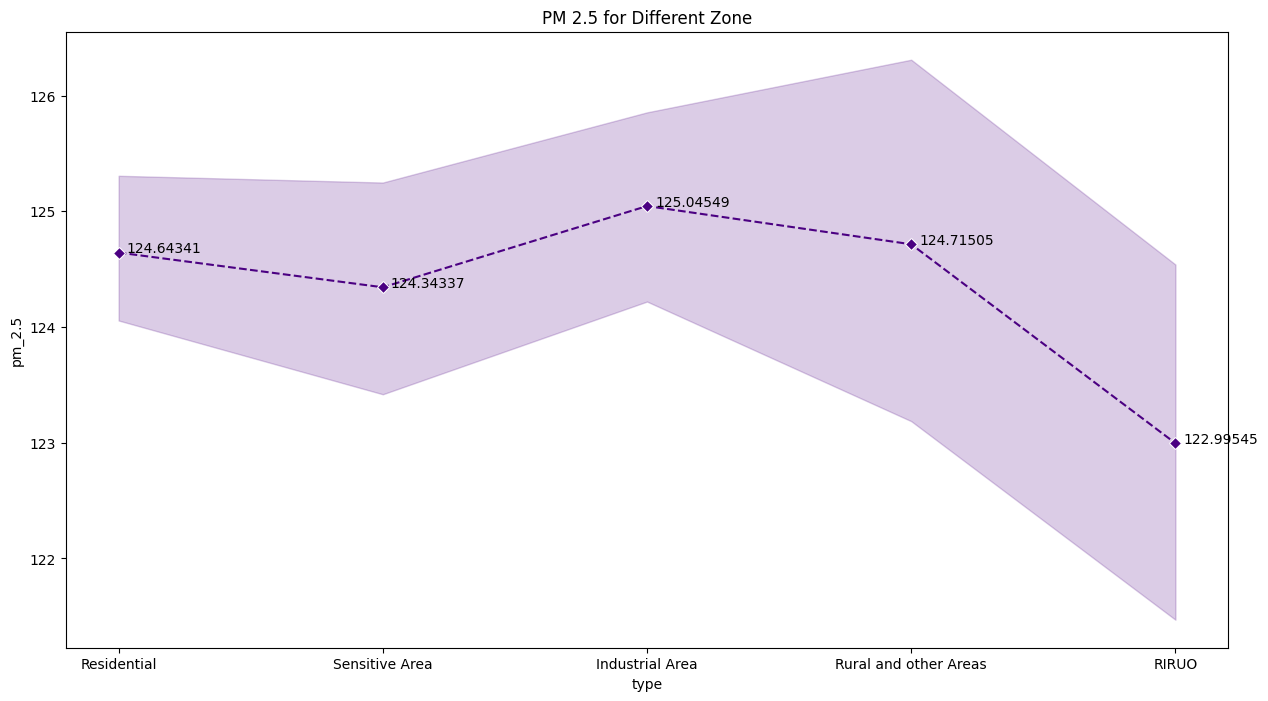

In [ ]:
# How do PM2.5 levels vary Zonewise over the last 5 years using a line chart


yt=df[df['Year'].between(2023-5,2023)]

plt.figure(figsize=(15,8))

cl=sb.lineplot(x=yt['type'],y=yt['pm_2.5'],color='indigo',marker='D',linestyle='--')

for j in cl.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b,round(b,5))

plt.title(f'PM 2.5 for Different Zone')

plt.show()

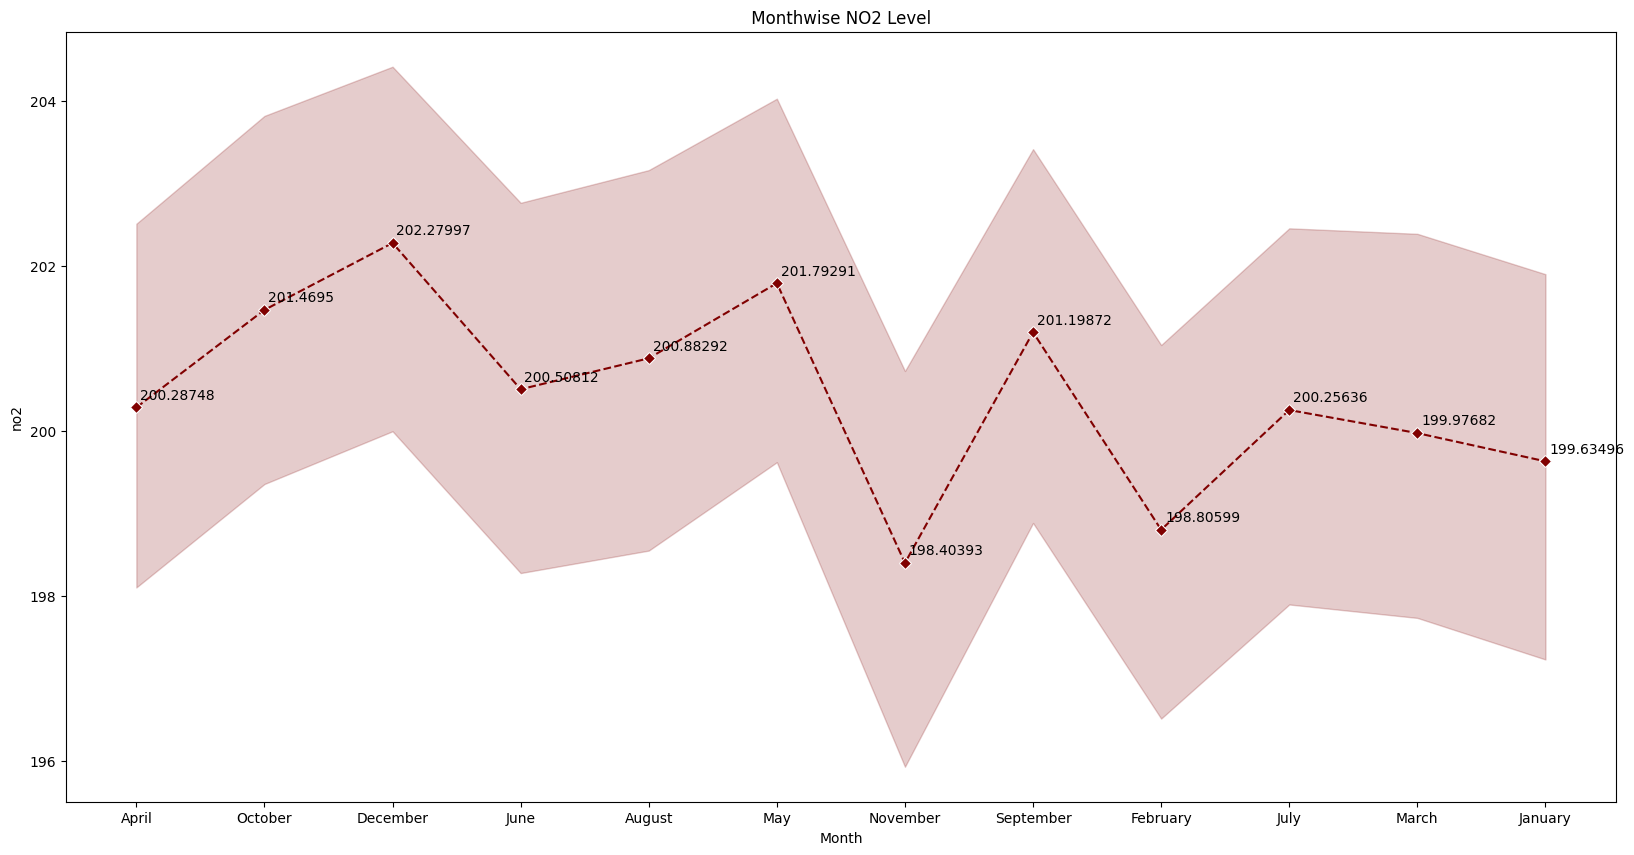

In [ ]:
# What is the Monthly trend of NO2 levels over the past 5 years

yt=df[df['Year'].between(2023-5,2023)]

plt.figure(figsize=(20,10))



cl=sb.lineplot(x=yt['Month'],y=yt['no2'],color='maroon',marker='D',linestyle='--')
for j in cl.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b+0.1,round(b,5))
plt.title(f' Monthwise NO2 Level ')

plt.show()

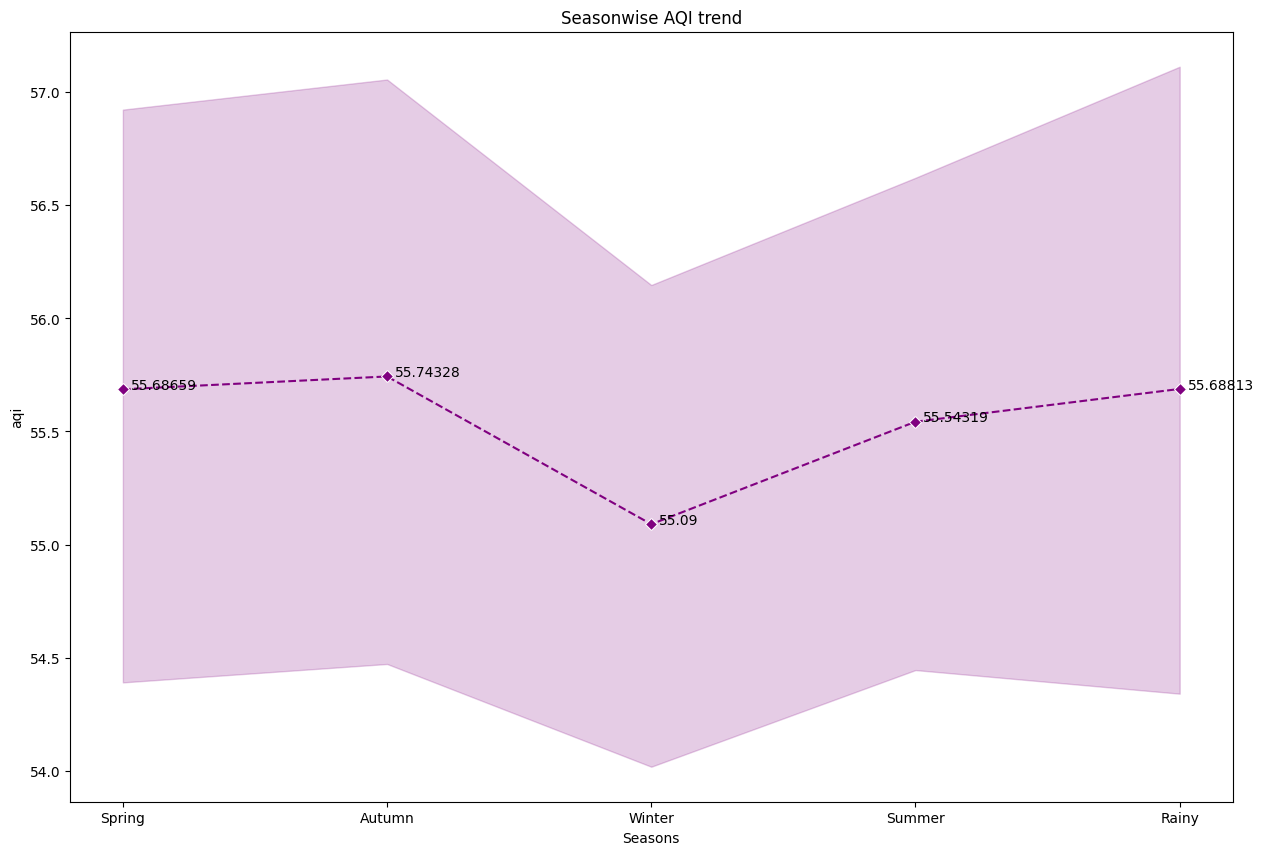

In [ ]:
# Show a seasonal trend analysis of AQI levels across different years

plt.figure(figsize=(15,10))

cl=sb.lineplot(x=yt['Seasons'],y=yt['aqi'],color='purple',marker='D',linestyle='--')
for j in cl.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b,round(b,5))
plt.title('Seasonwise AQI trend')


plt.show()

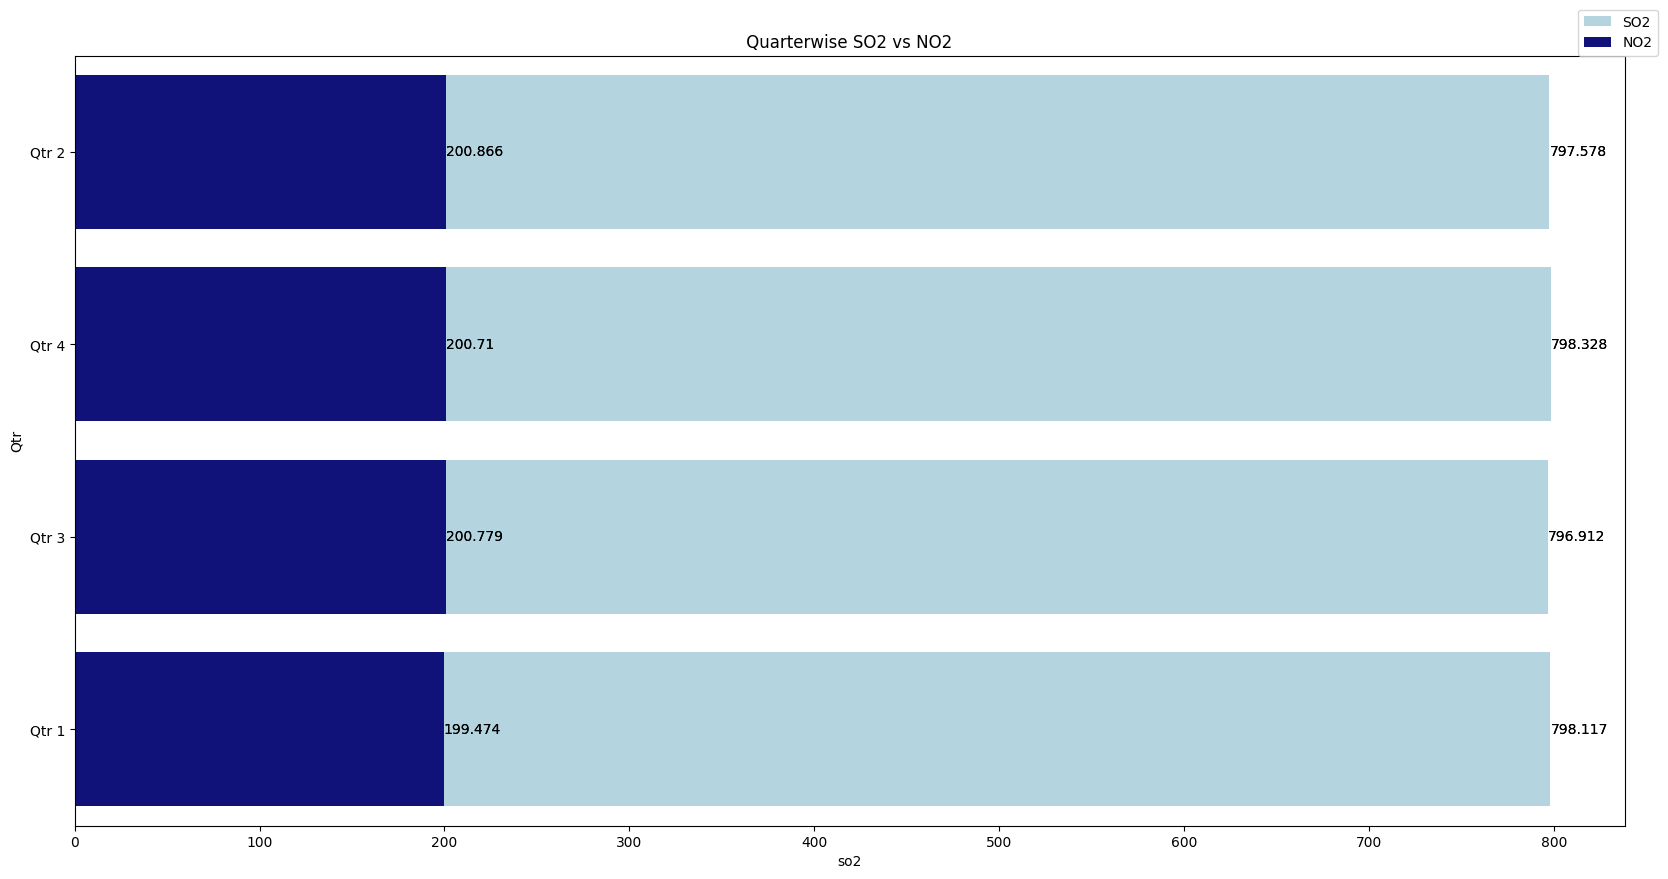

In [ ]:
# Compare the quarterly pollution levels of SO2, NO2 using a stacked area chart.


plt.figure(figsize=(20,10))


c1=sb.barplot(y=yt['Qtr'] ,color='lightblue',x=yt['so2'],label='SO2',errorbar=('ci',0))
c2=sb.barplot(y=yt['Qtr'], color='darkblue',x=yt['no2'],label='NO2',errorbar=('ci',0))

for j in c1.containers:
  c1.bar_label(j)
for k in c1.containers:
  c1.bar_label(k)
plt.title(' Quarterwise SO2 vs NO2 ')
plt.legend(loc=(0.97,1))

plt.show()


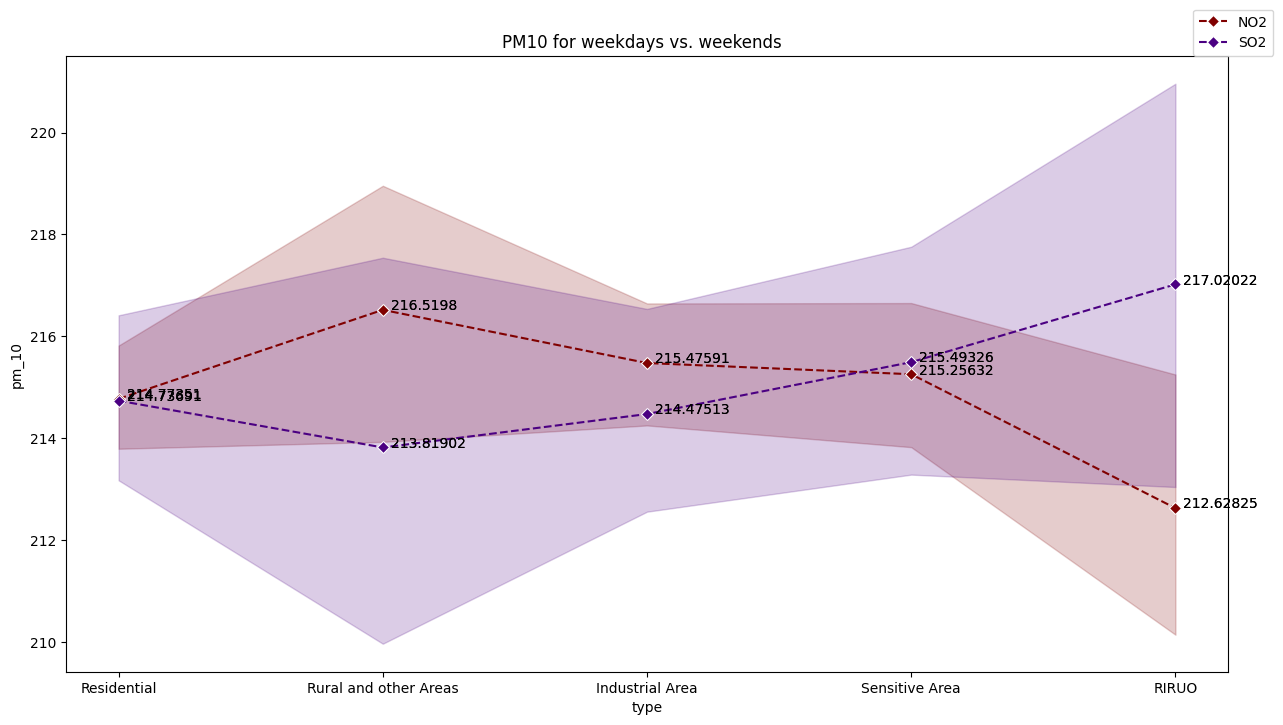

In [ ]:
# How does air pollution PM 10 fluctuate on weekdays vs. weekends over time


plt.figure(figsize=(15,8))

wd=df[df['IsWeekend']=='Weekday']
wk=df[df['IsWeekend']!='Weekday']

c1=sb.lineplot(x=wd['type'],y=wd['pm_10'],color="maroon",label='NO2',marker='D',linestyle='--')
c2=sb.lineplot(x=wk['type'],y=wk['pm_10'],color="indigo",label='SO2',marker='D',linestyle='--')
for j in c1.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
  for c,d in zip(k.get_xdata(),k.get_ydata()):
    plt.text(c+0.03,d,round(d,5))

plt.title('PM10 for weekdays vs. weekends  ')
plt.legend(loc=(0.97,1))



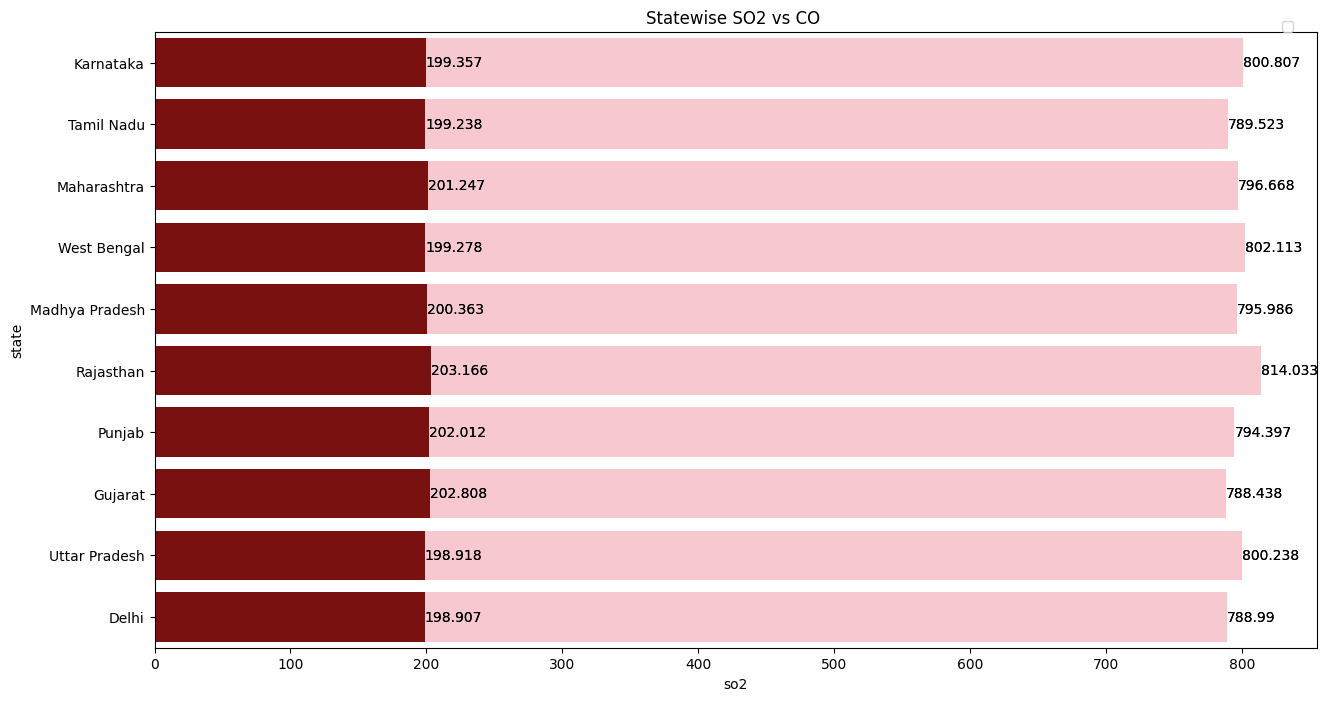

In [ ]:
# Which State of the year consistently show the highest Relattion between so2 & co

plt.figure(figsize=(15,8))
c1=sb.barplot(data=yt,x='so2',y='state',color='pink',errorbar=('ci',0))
c2=sb.barplot(data=yt,x='co',y='state',errorbar=('ci',0),color='darkred')
for j in c1.containers:
  c1.bar_label(j)
for k in c2.containers:
  c2.bar_label(k)

plt.title(f'Statewise SO2 vs CO ')
plt.legend(loc=(0.97,1))

plt.show()

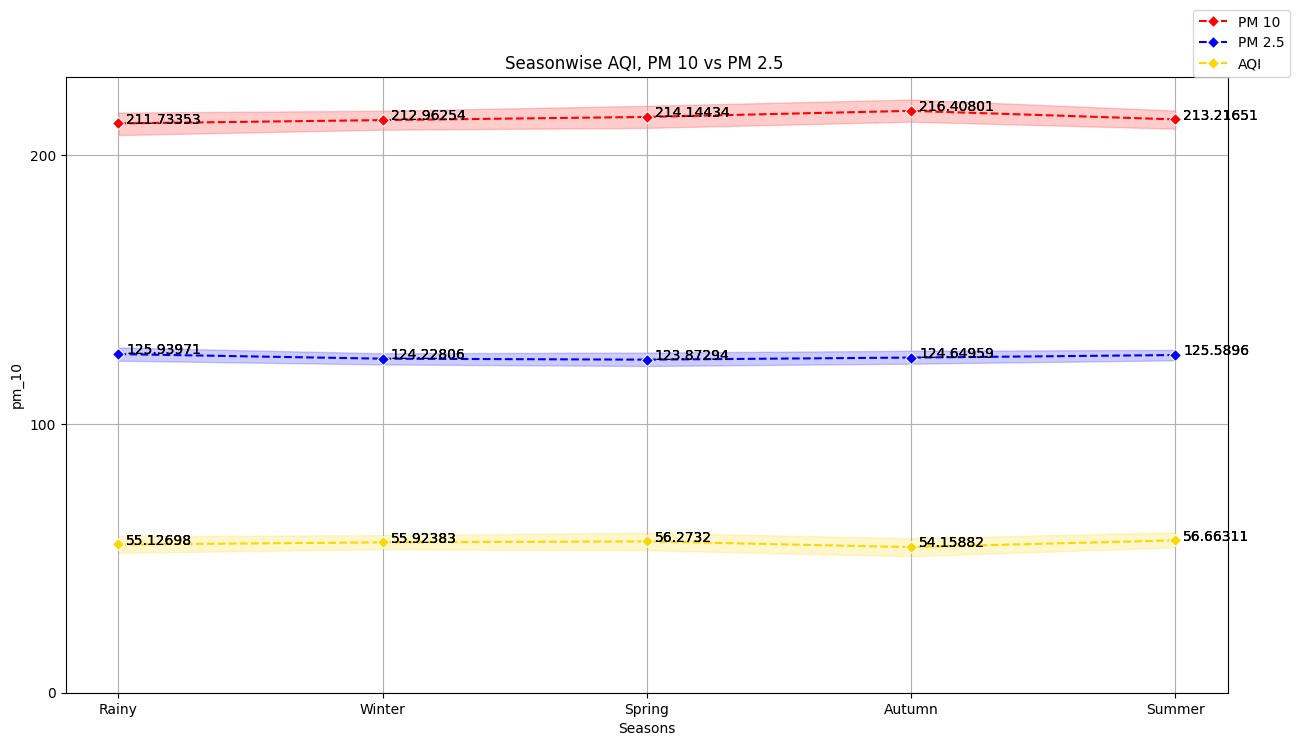

In [ ]:
# Plot the yearly average AQI PM10, PM 2.5 concentrations to observe long-term trends.

yr=list(df['Year'].unique())
yr.sort(reverse=True)

plt.figure(figsize=(15,8))
c1=sb.lineplot(x=yt['Seasons'],y=yt['pm_10'],color="red",marker='D',linestyle='--',label='PM 10')
c2=sb.lineplot(x=yt['Seasons'],y=yt['pm_2.5'],color="blue",marker='D',linestyle='--',label='PM 2.5')
c3=sb.lineplot(x=yt['Seasons'],y=yt['aqi'],color="gold",marker='D',linestyle='--',label='AQI')

for j in c1.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
  for c,d in zip(k.get_xdata(),k.get_ydata()):
    plt.text(c+0.03,d,round(d,5))
for l in c3.get_lines():
  for e,f in zip(l.get_xdata(),l.get_ydata()):
    plt.text(e+0.03,f,round(f,5))



plt.title('Seasonwise AQI, PM 10 vs PM 2.5 ')
plt.legend(loc=(0.97,1))
plt.yticks(np.arange(0,300,100))
plt.grid()

plt.show()


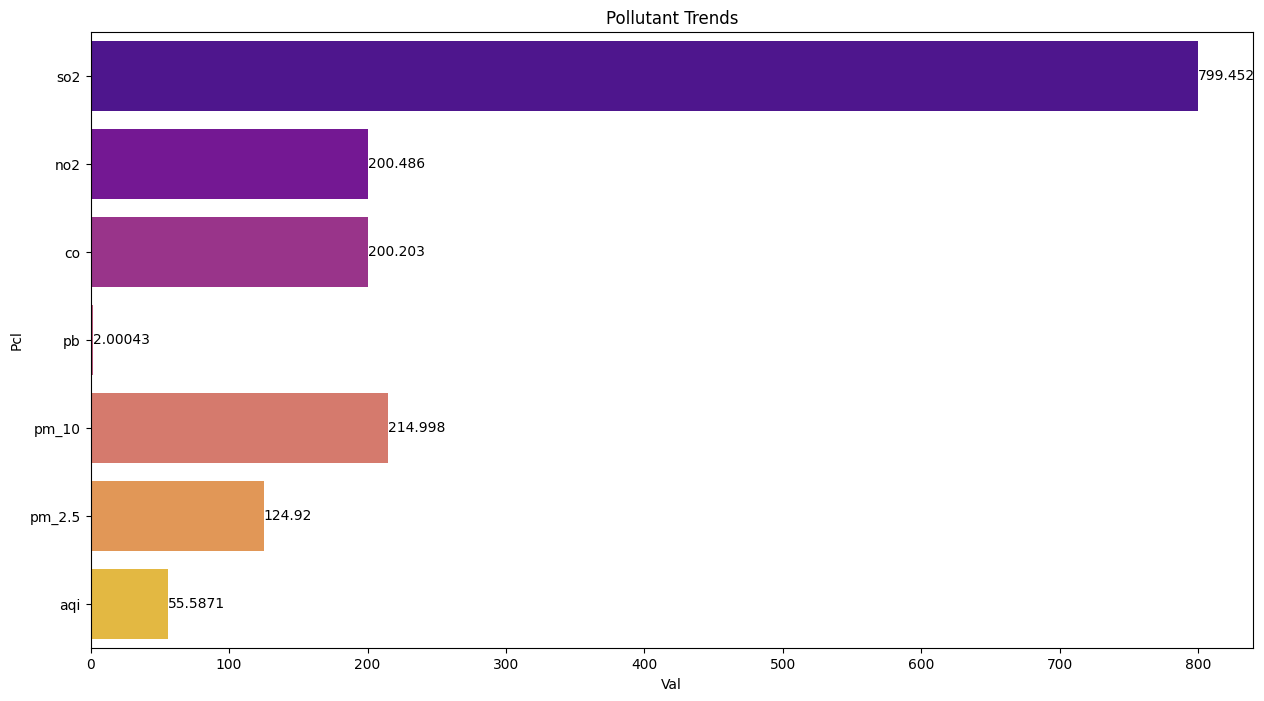

In [ ]:
# Identify  sharp increases or decreases in pollutant using an visualization.


clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

plt.figure(figsize=(15,8))

xt1=df[clm].mean().reset_index()
xt1.columns=['Pcl','Val']
cl=sb.barplot(y=xt1['Pcl'],x=xt1['Val'],palette='plasma')

for j in cl.containers:
  cl.bar_label(j)
plt.title(f'Pollutant Trends')

plt.show()

#Start from hete


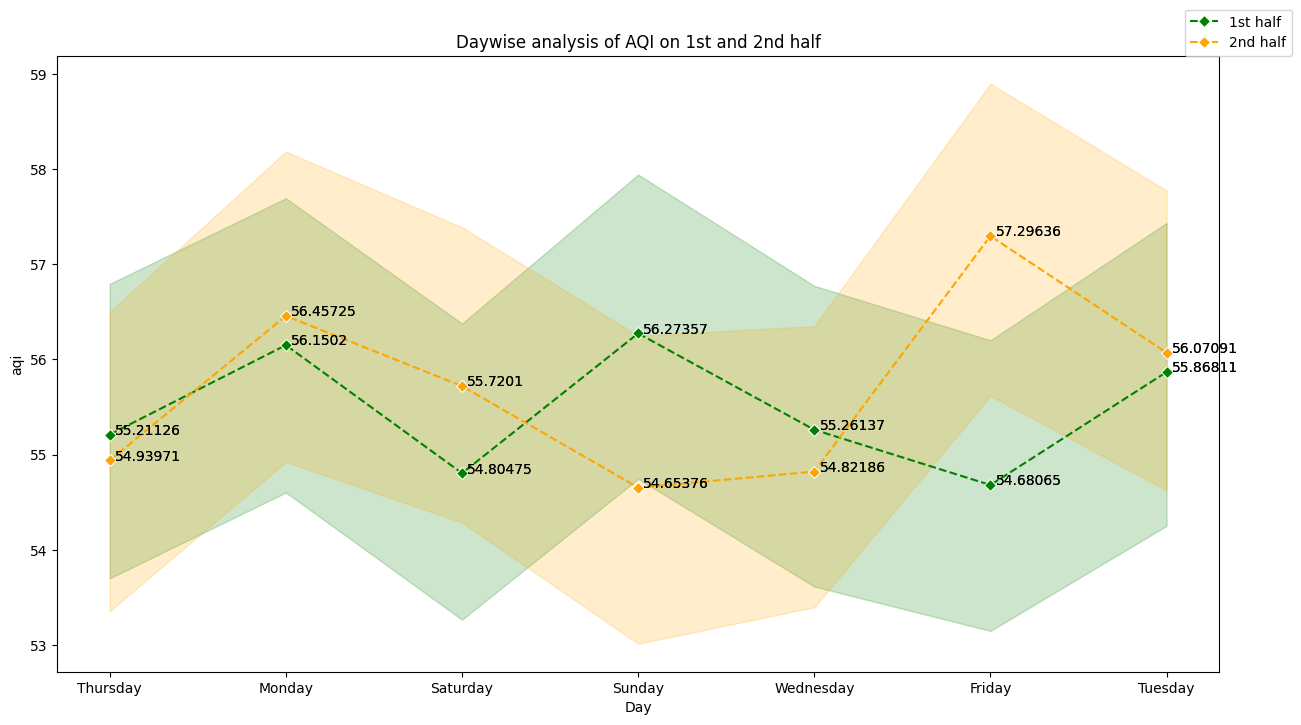

In [ ]:
# How does pollution AQI vary 1st and 2nd half Dayewise



plt.figure(figsize=(15,8))

h1=df[df['Qtr'].isin(['Qtr 1','Qtr 2'])]
h2=df[df['Qtr'].isin(['Qtr 3','Qtr 4'])]
c1=sb.lineplot(x=h1['Day'],y=h1['aqi'],color="green",marker='D',linestyle='--',label='1st half')
c2=sb.lineplot(x=h2['Day'],y=h2['aqi'],color="orange",marker='D',linestyle='--',label='2nd half')

for j in c1.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
  for c,d in zip(k.get_xdata(),k.get_ydata()):
    plt.text(c+0.03,d,round(d,5))

plt.title('Daywise analysis of AQI on 1st and 2nd half')
plt.legend(loc=(0.97,1))

/usr/local/lib/python3.11/dist-packages/pypalettes/deprecated.py:71: DeprecationWarning: 
The get_hex() function is deprecated and will be removed in a future version.
Please, use: load_cmap('Acadia').hex

  warnings.warn(warning_message, category=DeprecationWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-pa

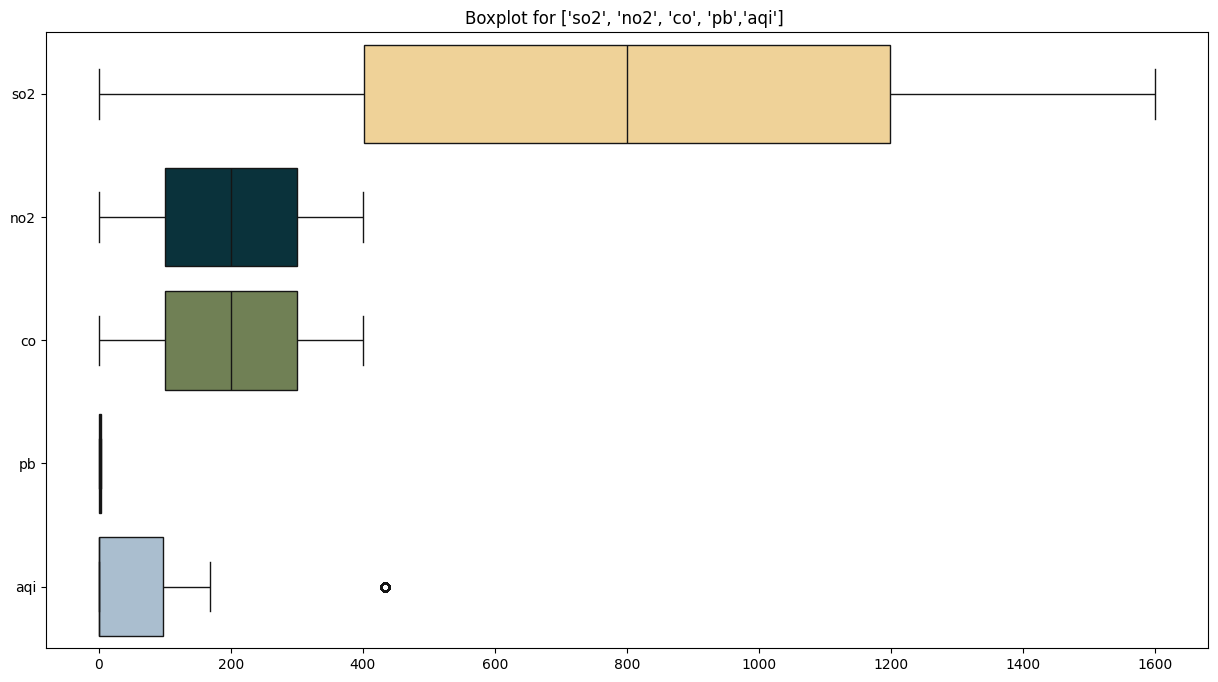

In [ ]:
# Show the daily average pollution levels ('so2', 'no2', 'co', 'pb','aqi') across an entire year using boxplot.
from pypalettes import get_hex

cl=['so2', 'no2', 'co', 'pb','aqi']

plt.figure(figsize=(15,8))
palette = get_hex("Acadia", keep_first_n=len(cl))

sb.boxplot(data=df[cl],orient='h',palette=palette )
plt.title(f"Boxplot for ['so2', 'no2', 'co', 'pb','aqi'] ")

plt.show()

#### 2. Location & State-Based Visualizations

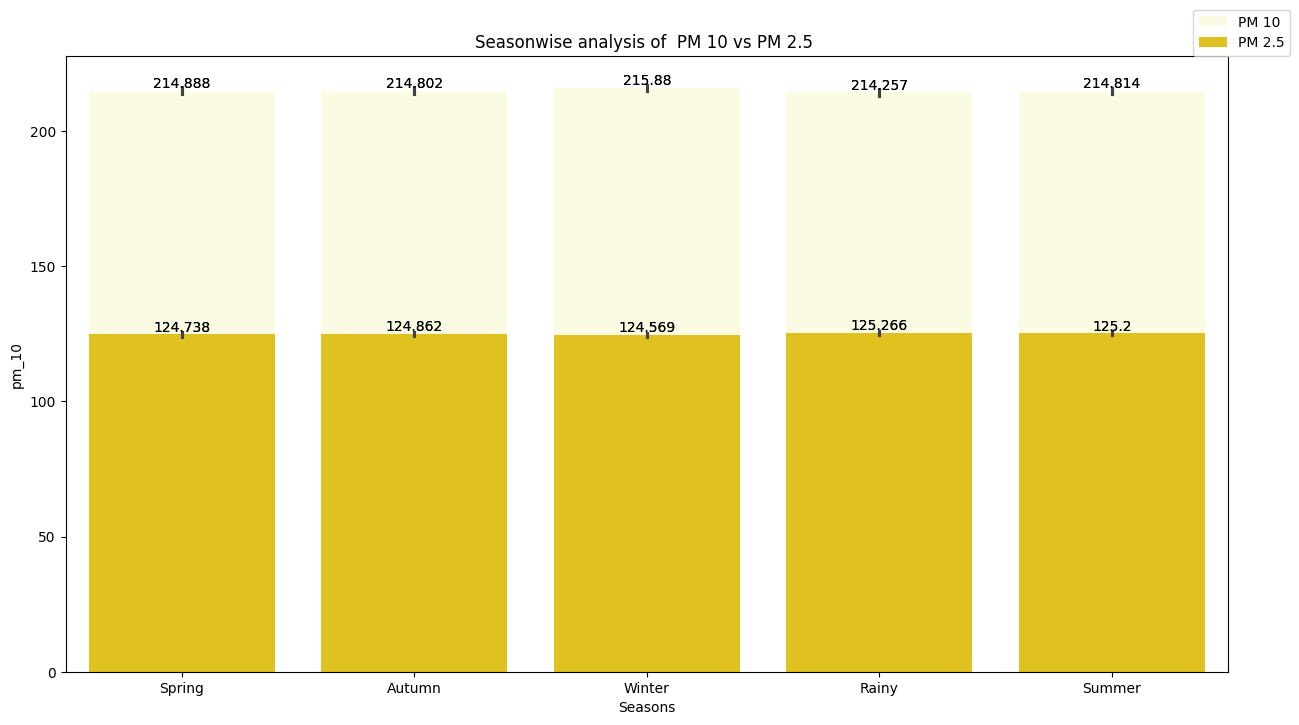

In [ ]:
#  seasonwisewise have the  PM 2.5 vs PM 10 levels

yr=list(df['Year'].unique())
yr.sort(reverse=True)

plt.figure(figsize=(15,8))

c1=sb.barplot(x=df['Seasons'],y=df['pm_10'],color="lightyellow",estimator='mean',label='PM 10')
c2=sb.barplot(x=df['Seasons'],y=df['pm_2.5'],color="gold",estimator='mean',label='PM 2.5')
for j in c1.containers:
  c1.bar_label(j)
for k in c2.containers:
  c2.bar_label(k)
plt.title(f'Seasonwise analysis of  PM 10 vs PM 2.5 ')
plt.legend(loc=(0.97,1))

plt.show()

/usr/local/lib/python3.11/dist-packages/pypalettes/deprecated.py:71: DeprecationWarning: 
The get_hex() function is deprecated and will be removed in a future version.
Please, use: load_cmap('Acadia').hex

  warnings.warn(warning_message, category=DeprecationWarning)
/usr/local/lib/python3.11/dist-packages/pypalettes/deprecated.py:71: DeprecationWarning: 
The get_hex() function is deprecated and will be removed in a future version.
Please, use: load_cmap('sierra2').hex

  warnings.warn(warning_message, category=DeprecationWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kw

Text(0.5, 1.0, 'Graph 2 : Boxplot for South and East')

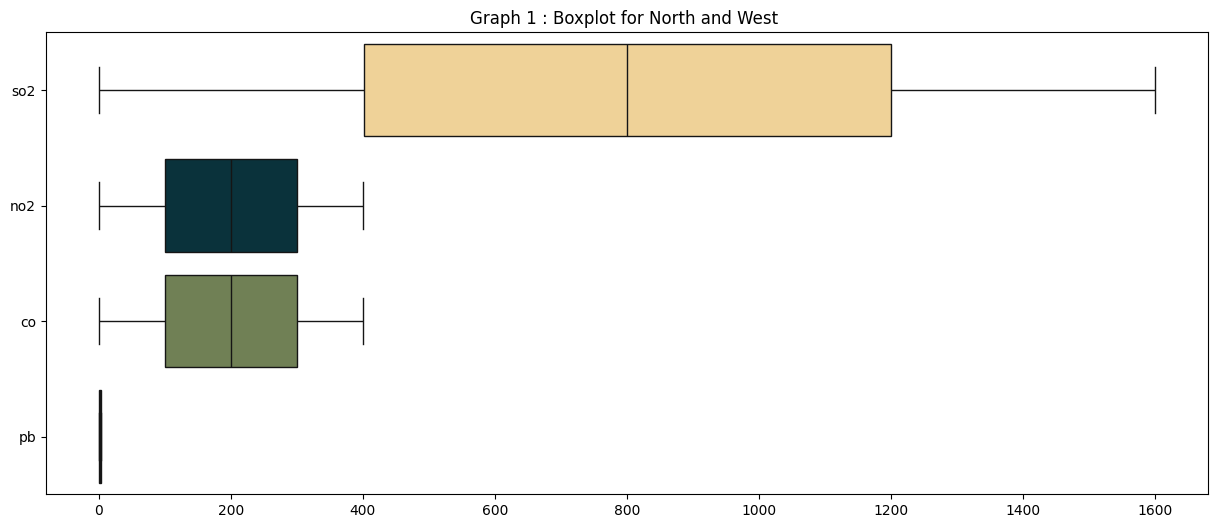

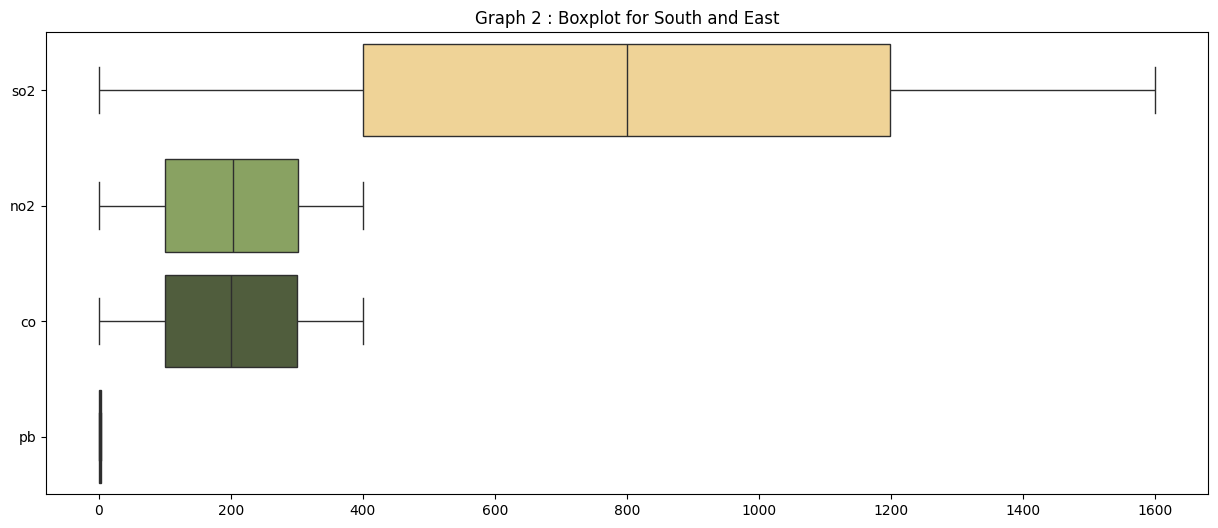

In [ ]:
# Compare pollution levels in nort and west vs. south and east  locations using a box plot.

yr=list(df['Year'].unique())
yr.sort(reverse=True)
cl=['so2', 'no2', 'co', 'pb']
palette1 = get_hex("Acadia", keep_first_n=len(cl))
palette2 = get_hex("sierra2", keep_first_n=len(cl))

plt.figure(figsize=(15,6))
h1=df[df['region'].isin(['North', 'West'])]
sb.boxplot(data=h1[cl],orient='h',palette=palette1)
plt.title(f'Graph 1 : Boxplot for North and West ')

plt.figure(figsize=(15,6))
h2=df[df['region'].isin(['South', 'East'])]
sb.boxplot(data=h2[cl],orient='h',palette=palette2)
plt.title(f'Graph 2 : Boxplot for South and East')


<ipython-input-89-e037ba556685>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cl=sb.barplot(x=er['location'],y=er['pm_10'], palette='husl',edgecolor='black',errorbar=('ci',0 ))


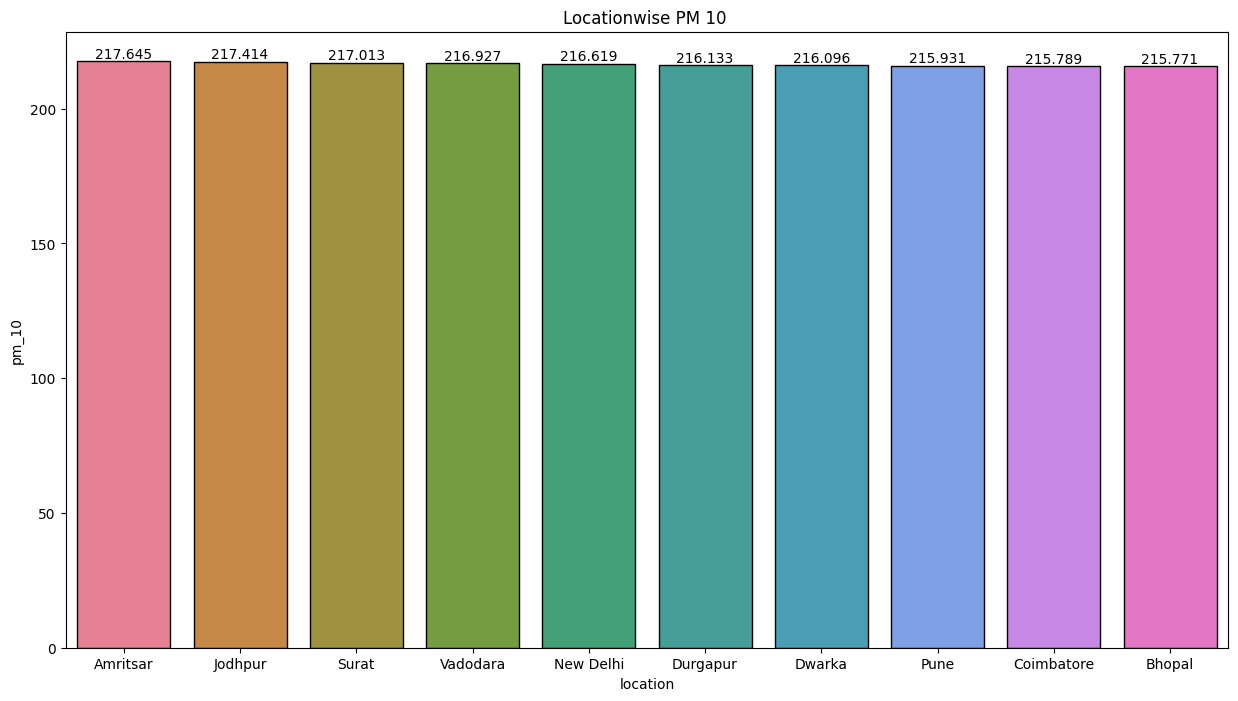

In [ ]:
# What are the top 10 most polluted locations in the dataset having High PM 10 ?


plt.figure(figsize=(15,8))
er=df.groupby(['location'])['pm_10'].mean().reset_index()
er.sort_values(by='pm_10',ascending=False,inplace=True)
er=er.head(10)

cl=sb.barplot(x=er['location'],y=er['pm_10'], palette='husl',edgecolor='black',errorbar=('ci',0 ))
for i in cl.containers:
  cl.bar_label(i)


plt.title(f'Locationwise PM 10 ')
plt.show()

<ipython-input-93-784eb314ec35>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  c1=sb.barplot(data=df,x='so2',y='type',palette='coolwarm',errorbar=('ci',0))
<ipython-input-93-784eb314ec35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  c2=sb.barplot(data=df,x='pm_10',y='type',errorbar=('ci',0),palette='magma')


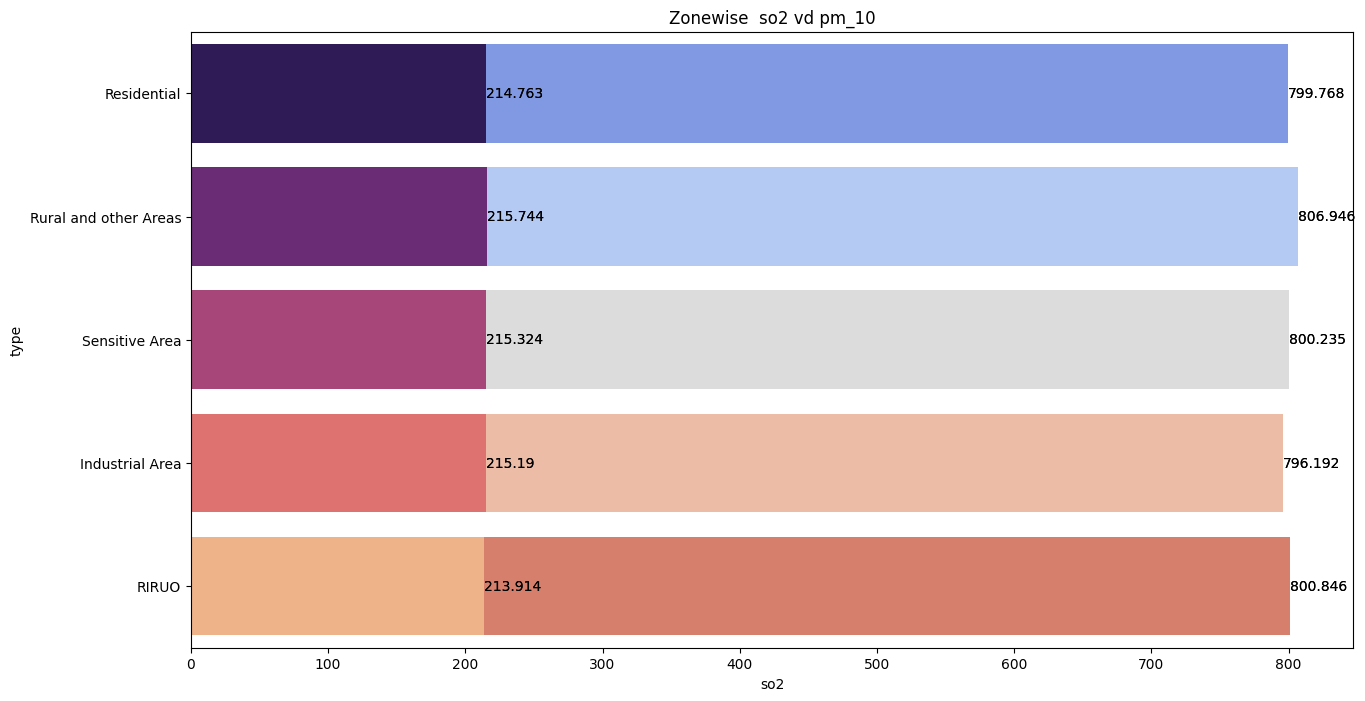

In [ ]:
# Visualize relationship b/w pm_10 and co using scatterplot zonewise ,

plt.figure(figsize=(15,8))

c1=sb.barplot(data=df,x='so2',y='type',palette='coolwarm',errorbar=('ci',0))
c2=sb.barplot(data=df,x='pm_10',y='type',errorbar=('ci',0),palette='magma')
for j in c1.containers:
  c1.bar_label(j)
for k in c2.containers:
  c2.bar_label(k)
plt.title(f'Zonewise  so2 vd pm_10')
plt.show()


Text(0.5, 1.0, 'Graph 2: Graph for 2nd half (Qtr 3 & Qtr4)')

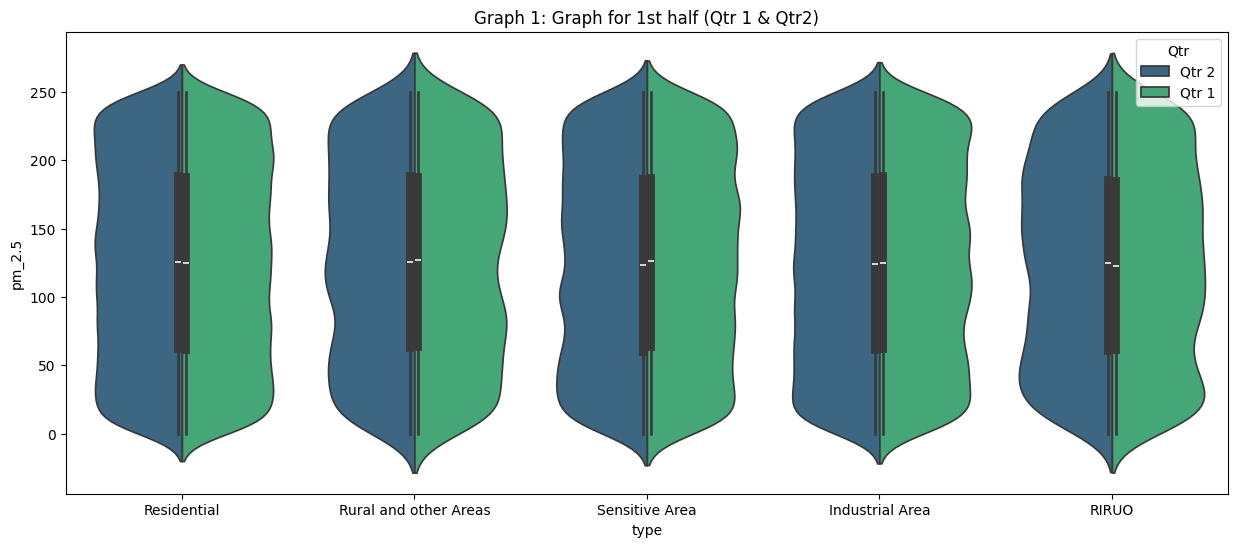

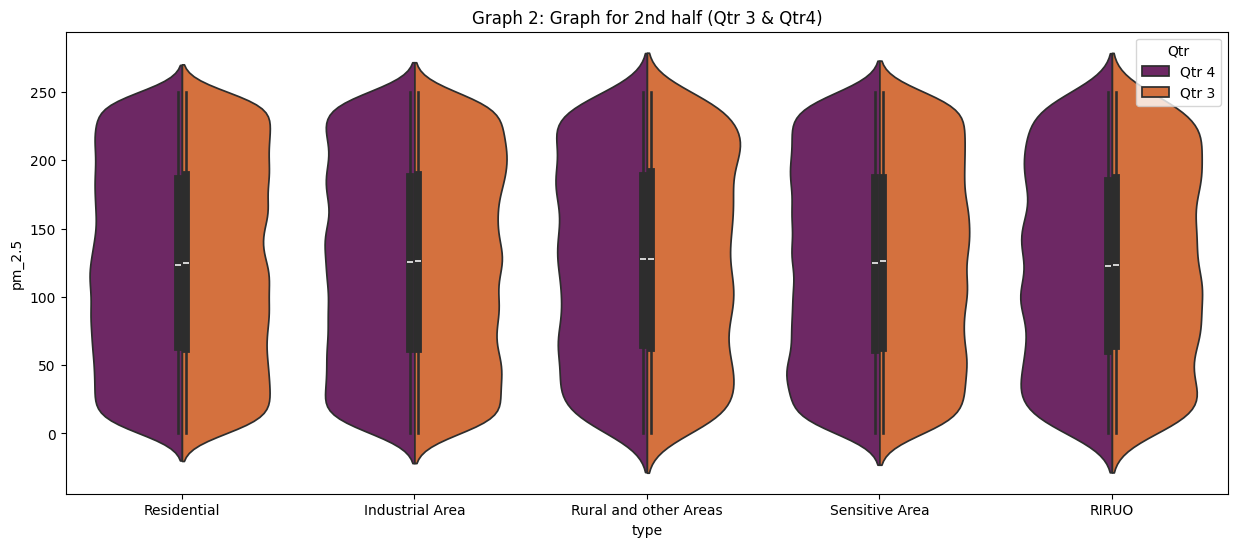

In [ ]:
# How do PM 2.5  differ  zonewise across 1st half vs. 2nd half? (Violin Chart)


plt.figure(figsize=(15,6))
h1=df[df['Qtr'].isin(['Qtr 1','Qtr 2'])]
sb.violinplot(data=h1,x='type',y='pm_2.5',hue='Qtr',palette='viridis',split=True)
plt.title(f'Graph 1: Graph for 1st half (Qtr 1 & Qtr2)')

plt.figure(figsize=(15,6))
h2=df[df['Qtr'].isin(['Qtr 3','Qtr 4'])]
sb.violinplot(data=h2,x='type',y='pm_2.5',hue='Qtr',palette='inferno',split=True)
plt.title(f'Graph 2: Graph for 2nd half (Qtr 3 & Qtr4)')

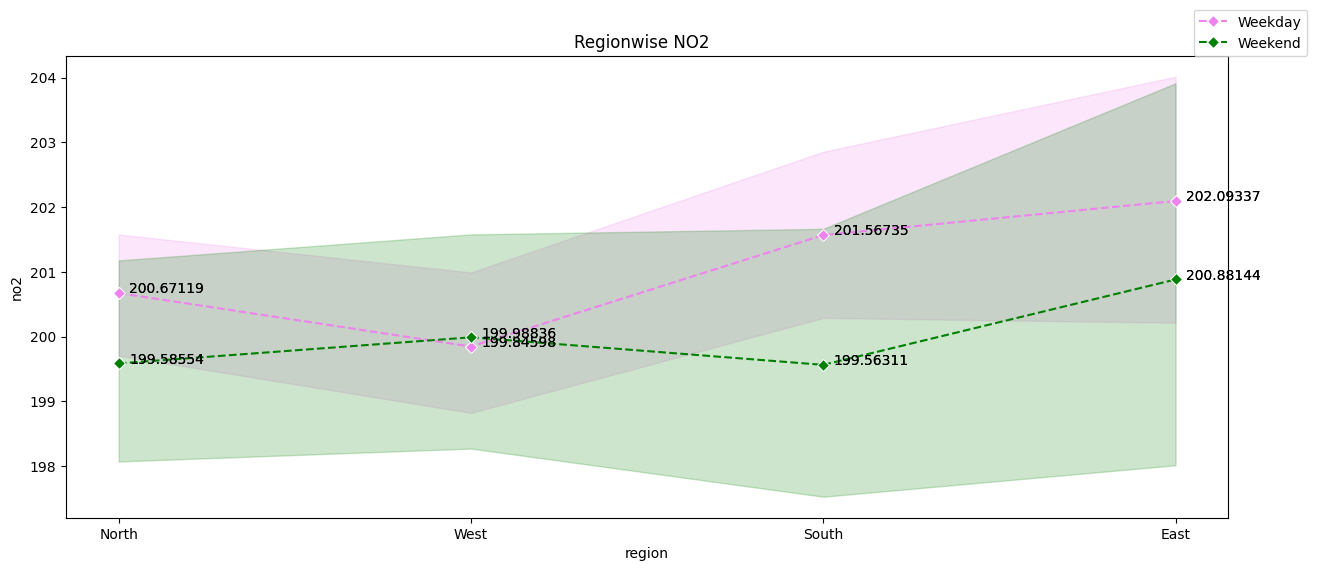

In [ ]:
#  Compare the NO2 pollution trends for the regions in weekend and weekdays over time.

plt.figure(figsize=(15,6))

h1=df[df['IsWeekend']=='Weekday']
h2=df[df['IsWeekend']=='Weekend']
c1=sb.lineplot(x=h1['region'],y=h1['no2'],label='Weekday',color="violet",marker='D',linestyle='--')
c2=sb.lineplot(x=h2['region'],y=h2['no2'],label='Weekend',color="green",marker='D',linestyle='--')

for j in c1.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
  for c,d in zip(k.get_xdata(),k.get_ydata()):
    plt.text(c+0.03,d,round(d,5))

plt.title('Regionwise NO2  ')
plt.legend(loc=(0.97,1))

Text(0.5, 1.0, 'Seasonwise Pollution ')

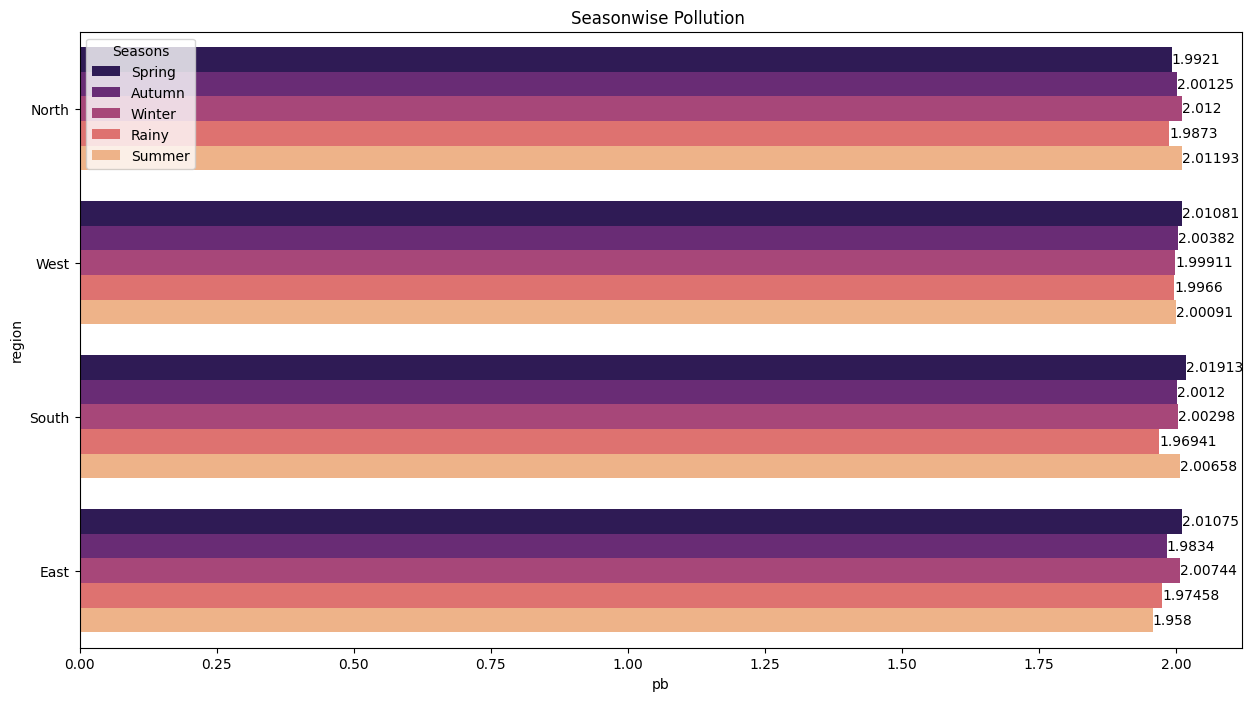

In [ ]:
# Which region show the largest seasonal variations in pollution

plt.figure(figsize=(15,8))

cl=sb.barplot(data=df,y='region',x='pb',hue='Seasons',errorbar=('ci',0),palette='magma')
for j in cl.containers:
  cl.bar_label(j)
plt.title(f'Seasonwise Pollution ')

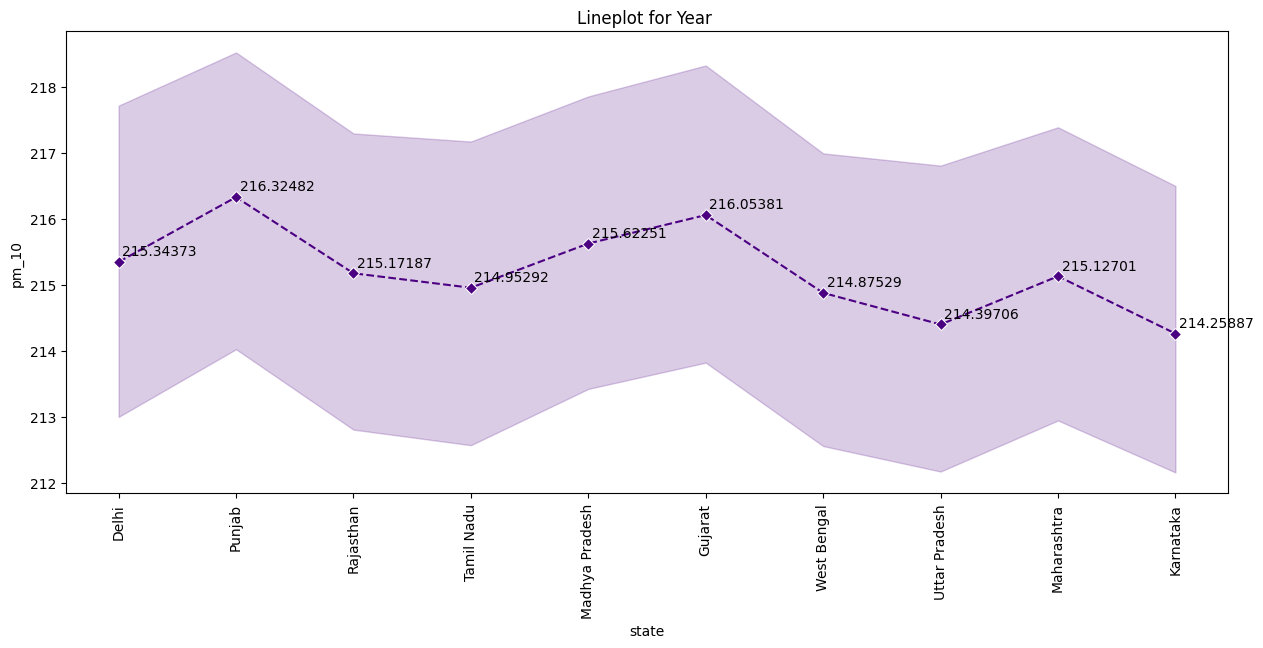

In [ ]:
# Use Lineplot to show the distribution of PM 10 contributors across state


plt.figure(figsize=(15,6))
cl=sb.lineplot(data=yt,x='state',y='pm_10',marker='D',color='indigo',linestyle='--')
for j in cl.get_lines():
  for a,b in zip(j.get_xdata(),j.get_ydata()):
    plt.text(a+0.03,b+0.1,round(b,5))


plt.title(f'Lineplot for Year ')
plt.xticks(rotation=90)

plt.show()


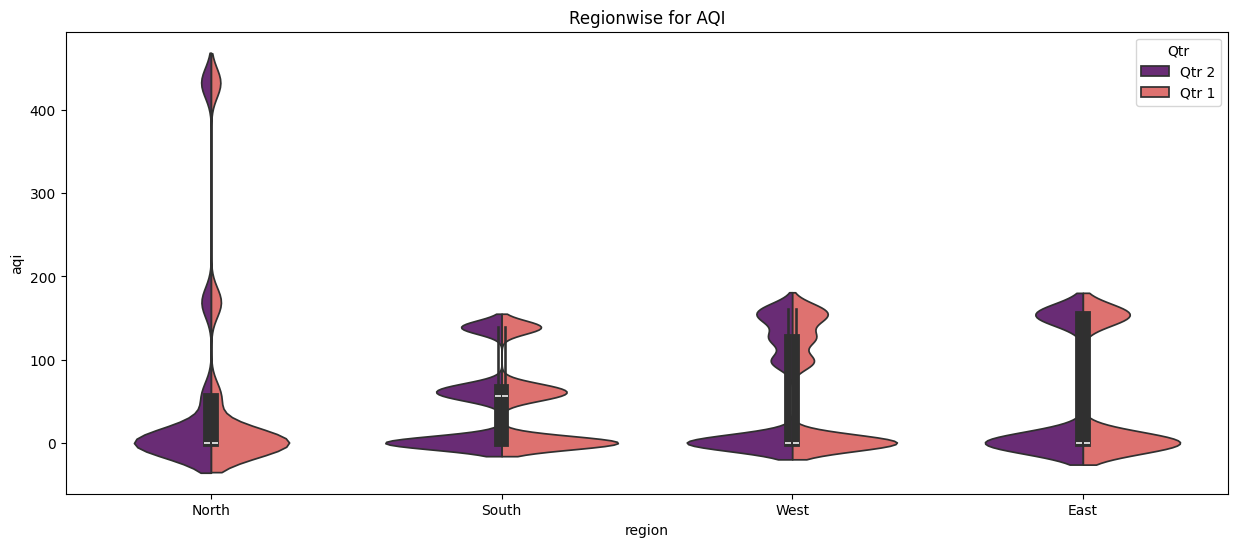

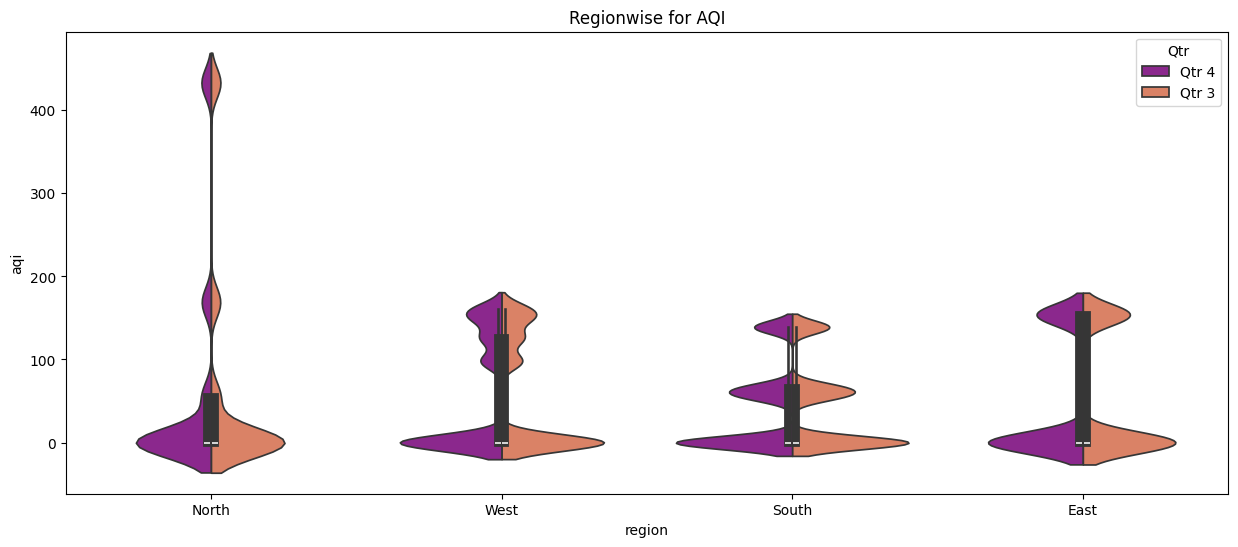

In [ ]:
# Show pollution (AQI) across different regions using a violinplot on a map for 1st and 2nd half


plt.figure(figsize=(15,6))
h1=df[df['Qtr'].isin(['Qtr 1','Qtr 2'])]
sb.violinplot(data=h1,x='region',y='aqi',hue='Qtr',palette='magma',split=True)
plt.title(f'Regionwise for AQI')

plt.figure(figsize=(15,6))
h2=df[df['Qtr'].isin(['Qtr 3','Qtr 4'])]
sb.violinplot(data=h2,x='region',y='aqi',hue='Qtr',palette='plasma',split=True)
plt.title(f'Regionwise for AQI')

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: 

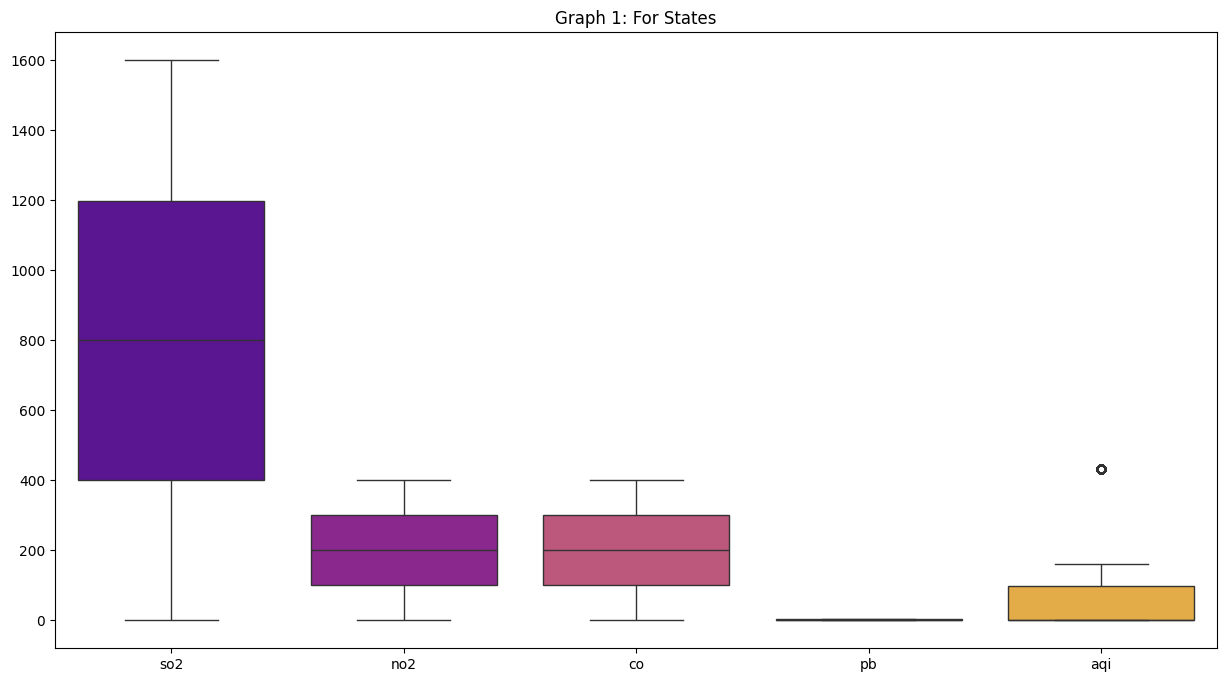

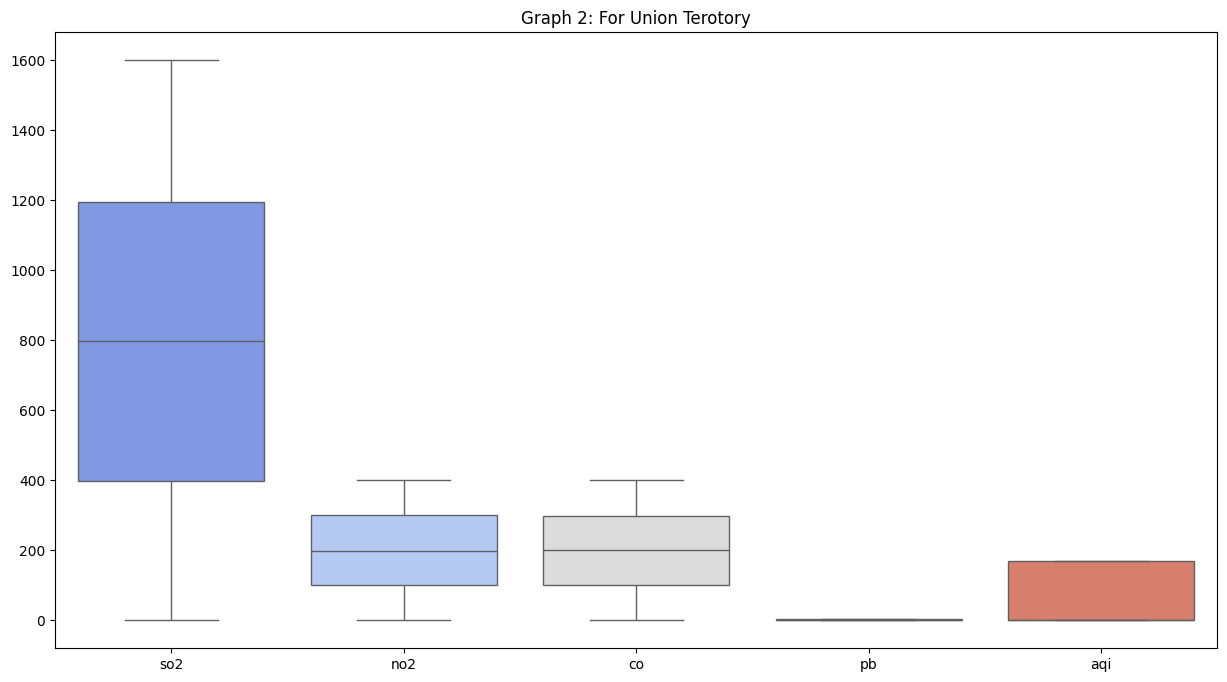

In [ ]:
# Compare pollution in capital cities vs. other cities using a box plot.


ut=['Daman & Diu','Delhi', 'Puducherry','Dadra & Nagar Haveli']
clm=['so2', 'no2', 'co', 'pb','aqi']

plt.figure(figsize=(15,8))
h1=df[~(df['state'].isin(ut))]
sb.boxplot(h1[clm],palette='plasma')
plt.title(f'Graph 1: For States')

plt.figure(figsize=(15,8))
h2=df[df['state'].isin(ut)]
sb.boxplot(h2[clm],palette='coolwarm')
plt.title(f'Graph 2: For Union Terotory')

plt.show()

#### 3. Pollutant-Specific Comparisons

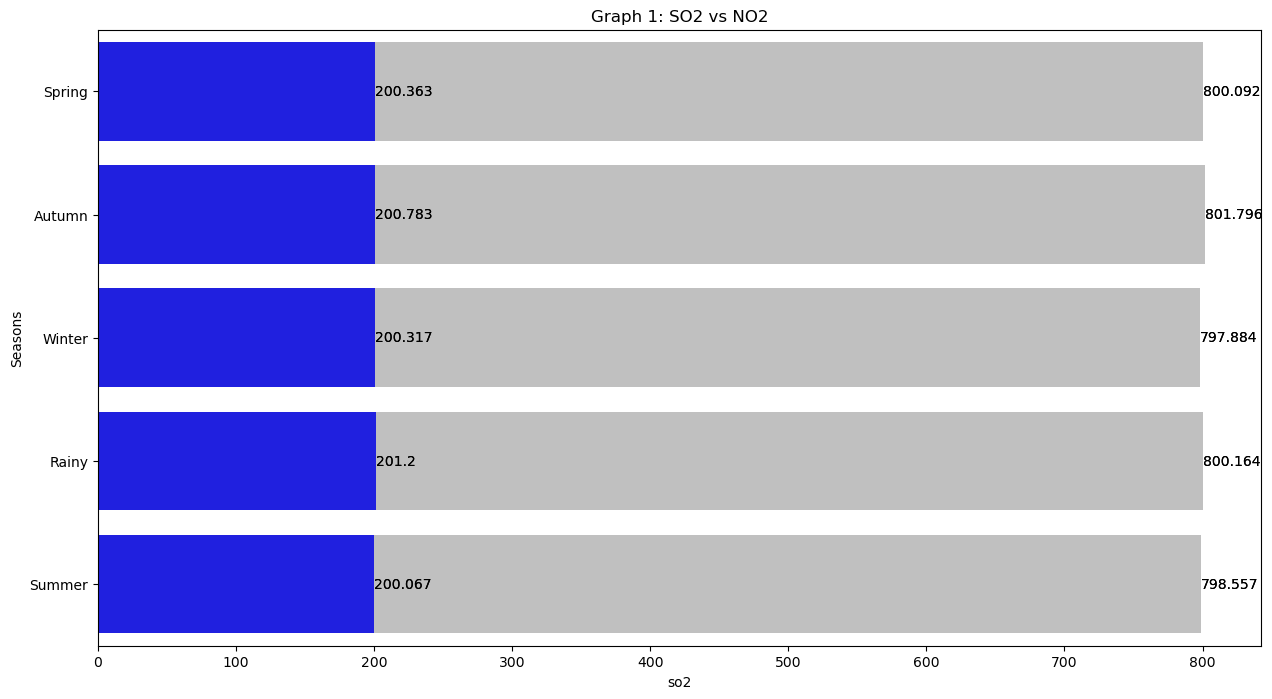

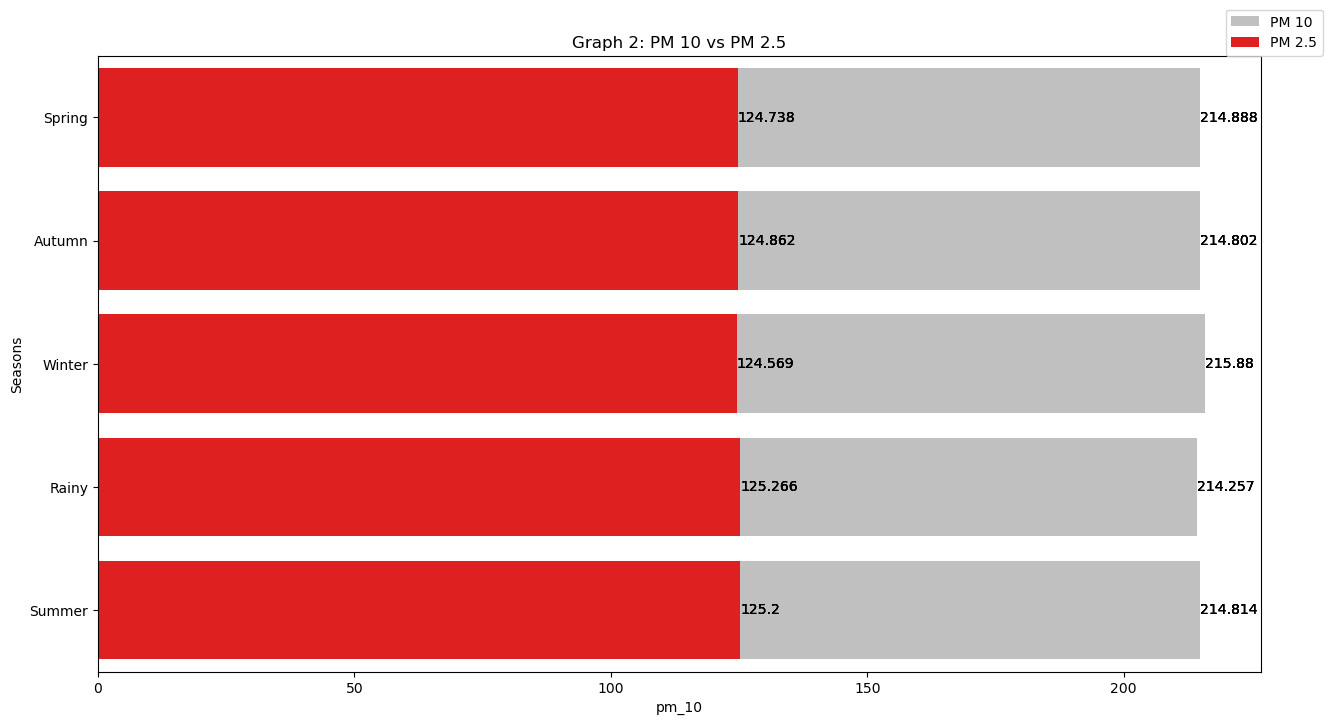

In [ ]:
#  How do SO2, NO2, PM10, and PM2.5 correlate with each other Seasonwise

plt.figure(figsize=(15,8))

c1=sb.barplot(data=df,x='so2',y='Seasons',errorbar=('ci',0),color='silver')
c2=sb.barplot(data=df,x='no2',y='Seasons',errorbar=('ci',0),color='blue')
for j in c1.containers:
    c1.bar_label(j)
for k in c2.containers:
    c2.bar_label(k)
plt.title(f'Graph 1: SO2 vs NO2')

plt.figure(figsize=(15,8))

c1=sb.barplot(data=df,x='pm_10',y='Seasons',errorbar=('ci',0),color='silver',label='PM 10')
c2=sb.barplot(data=df,x='pm_2.5',y='Seasons',errorbar=('ci',0),color='red',label='PM 2.5')
for j in c1.containers:
  c1.bar_label(j)
for k in c2.containers:
  c2.bar_label(k)
for l in c1.containers:
  c1.bar_label(l)
for m in c2.containers:
  c2.bar_label(m)
plt.title('Graph 2: PM 10 vs PM 2.5')

plt.legend(loc=(0.97,1))

plt.show()

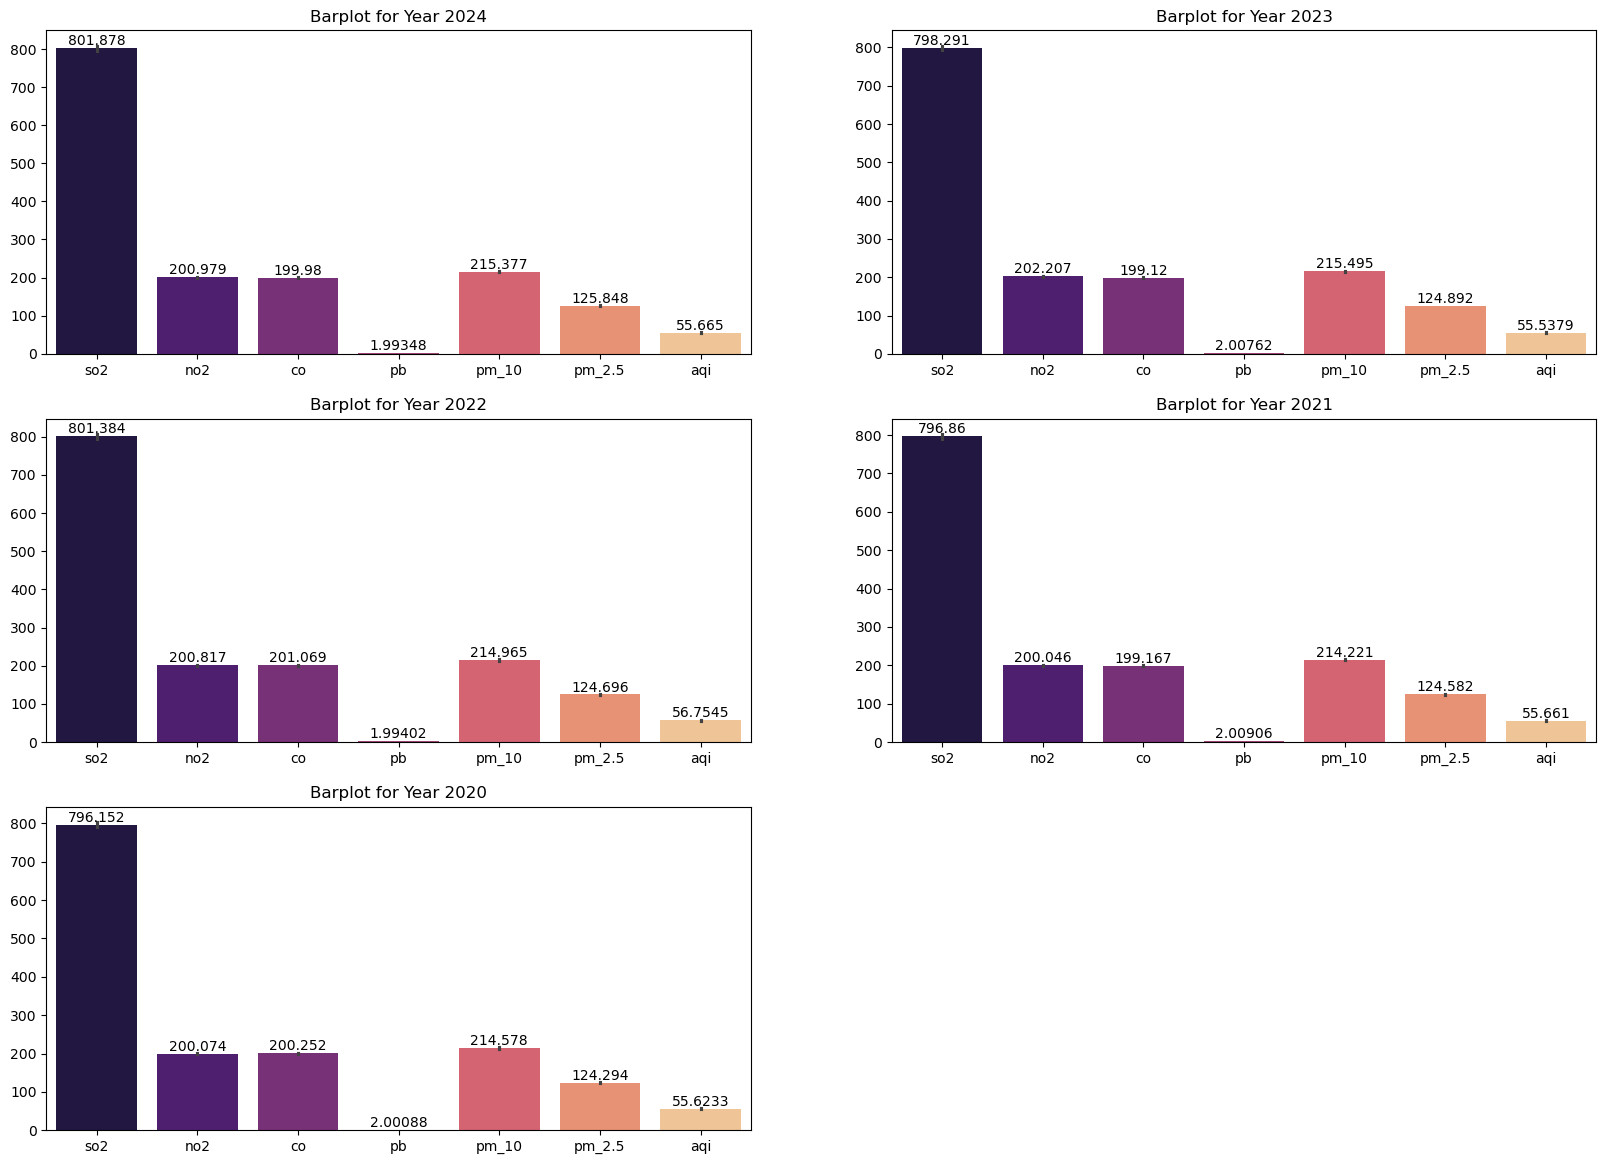

In [ ]:
#  Which pollutant has shown the most significant increase over the last 5 years

yr=list(df['Year'].unique())
yr.sort(reverse=True)
yr=yr[:5]
clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

plt.figure(figsize=(20,100))
for i in range(len(yr)):
    yt=df[df['Year']==yr[i]]
    plt.subplot(20,2,i+1)
    cl=sb.barplot(data=yt[clm],palette='magma')
    for j in cl.containers:
        cl.bar_label(j)
    plt.title(f'Barplot for Year {yr[i]}')

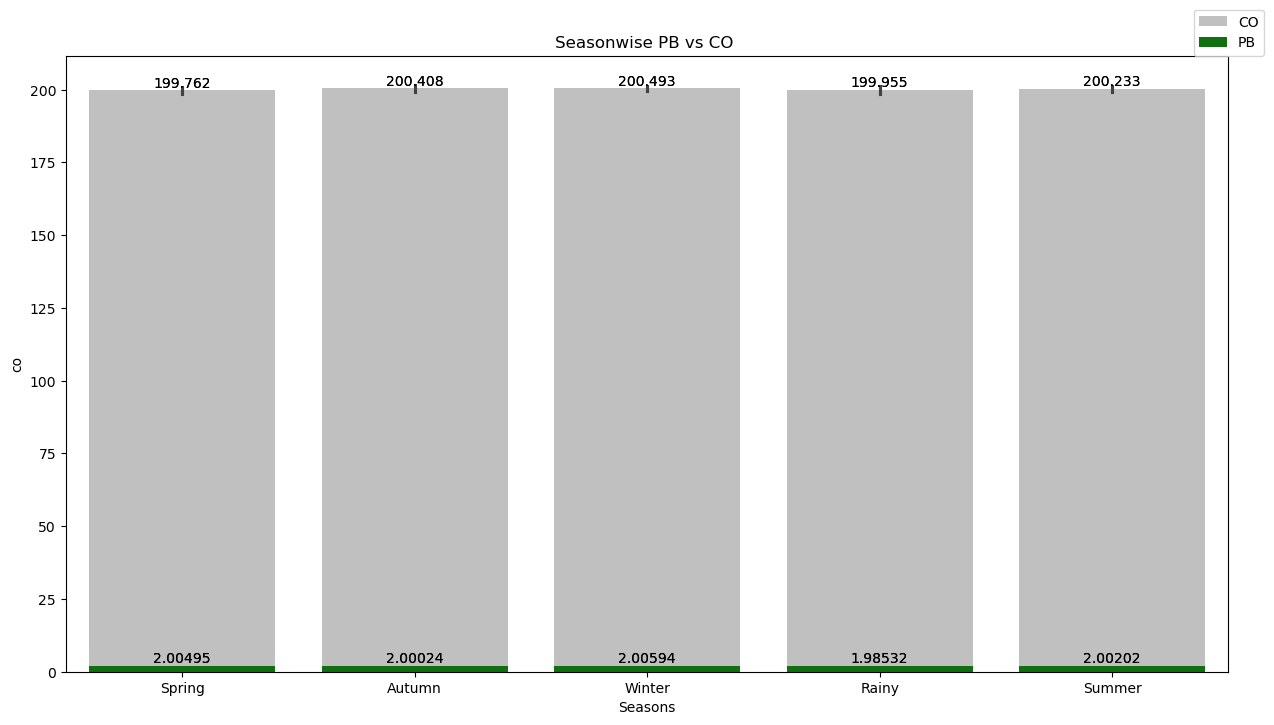

In [ ]:
# How do pb and co levels compare in different seasons

yr=list(df['Year'].unique())
yr.sort(reverse=True)

plt.figure(figsize=(15,8))


h2=sb.barplot(data=df,x='Seasons',y='co',color='silver',label='CO')
h1=sb.barplot(data=df,x='Seasons',y='pb',color='green',label='PB')


for j in h1.containers:
    h1.bar_label(j)
for k in h2.containers:
    h2.bar_label(k)
plt.title(f'Seasonwise PB vs CO ')
plt.legend(loc=(0.97,1))

plt.show()

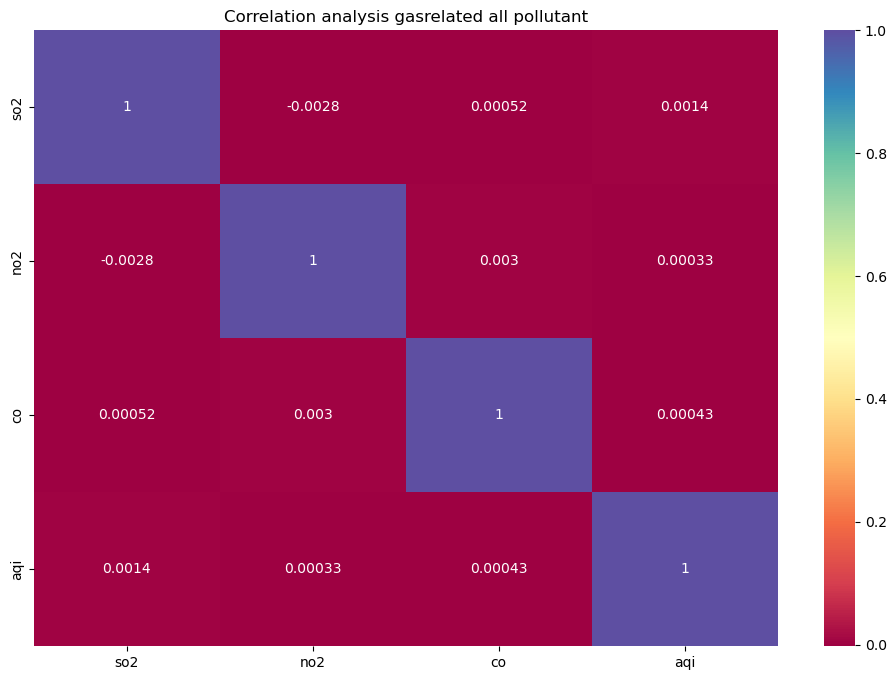

In [ ]:
# Compare the concentration levels of gas related pollutant

clm=['so2', 'no2', 'co','aqi']

plt.figure(figsize=(12,8))

sb.heatmap(df[clm].corr(),annot=True,cmap='Spectral')
plt.title(f'Correlation analysis gasrelated all pollutant')

plt.show()

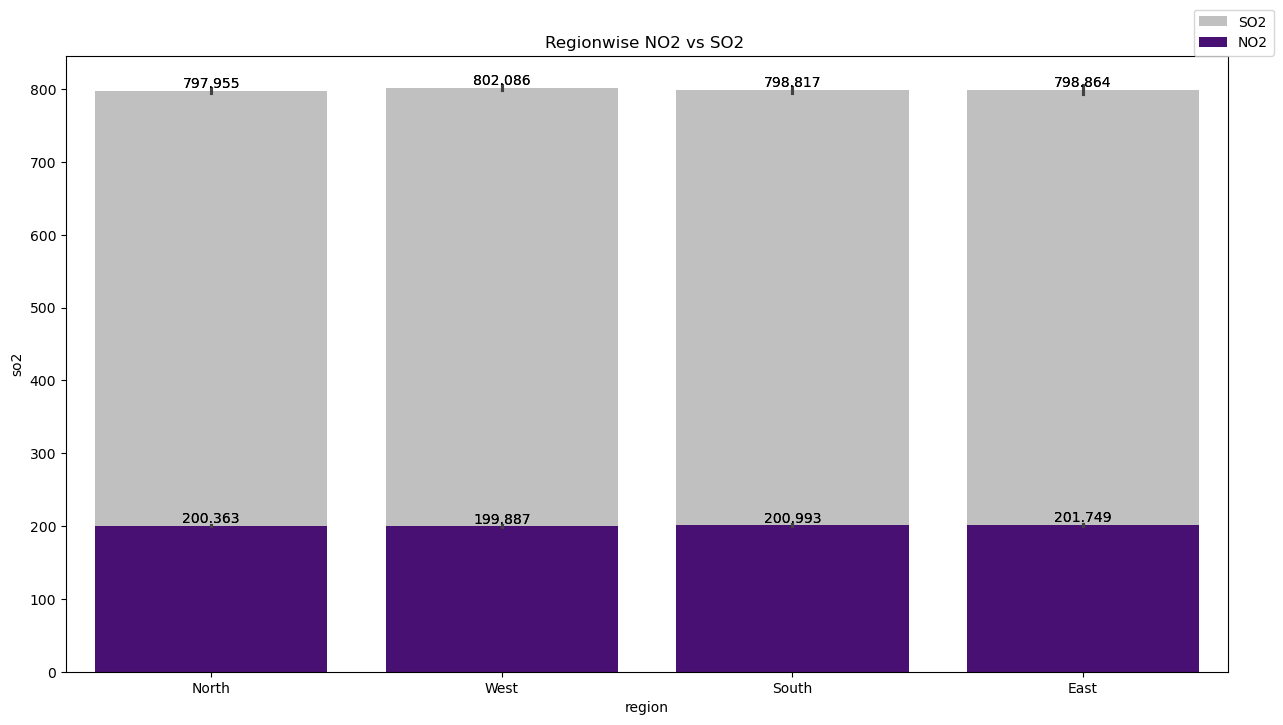

In [ ]:
# How does the ratio of NO2 to SO2 vary across different region

plt.figure(figsize=(15,8))

h2=sb.barplot(data=df,x='region',y='so2',color='silver',label='SO2')
h1=sb.barplot(data=df,x='region',y='no2',color='indigo',label='NO2')


for j in h1.containers:
    h1.bar_label(j)
for k in h2.containers:
    h2.bar_label(k)
plt.title(f'Regionwise NO2 vs SO2 ')
plt.legend(loc=(0.97,1))
plt.show()

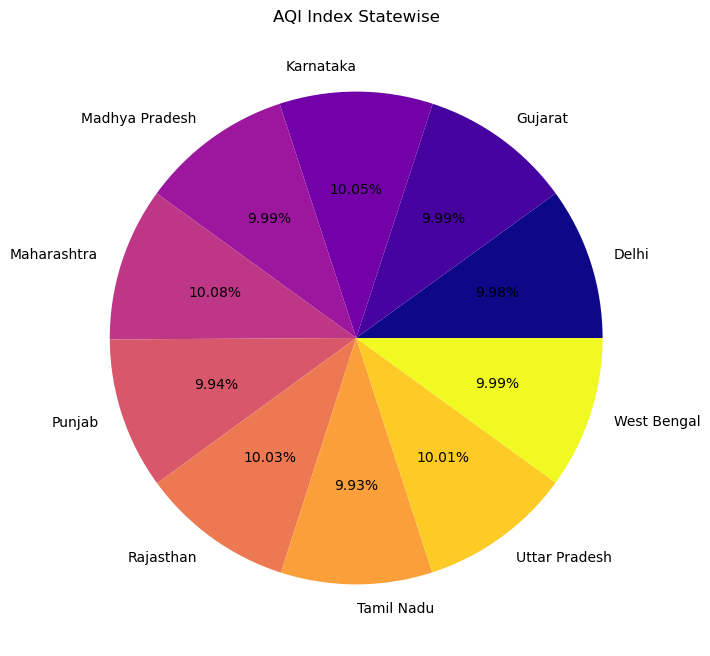

In [ ]:
# Visualize how AQI contributes to overall air quality in different state.
import matplotlib.cm as cm

plt.figure(figsize=(15,8))

st=df.groupby(['state'])['so2'].mean()

colormap = cm.get_cmap('plasma', len(st))  # You can replace 'plasma' with any colormap
colors = [colormap(i) for i in np.linspace(0, 1, len(st))]

plt.pie(st,labels=st.index,autopct="%0.2f%%",colors=colors)
plt.title(f'AQI Index Statewise')

plt.show()

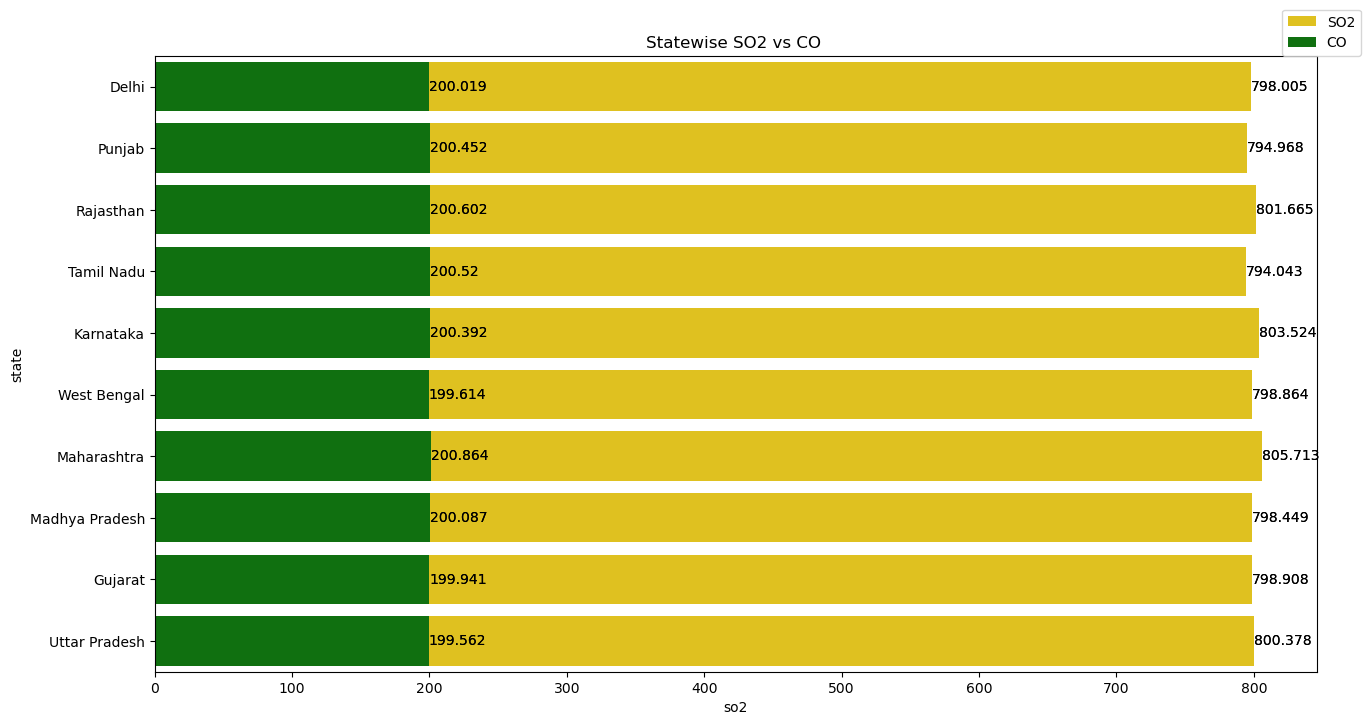

In [ ]:
# Show the pollutant composition (so2 & co) per state using a stacked bar char

plt.figure(figsize=(15,8))

h1=sb.barplot(data=df,y='state',x='so2',color='gold',label='SO2',errorbar=('ci',0))
h2=sb.barplot(data=df,y='state',x='co',color='green',label='CO',errorbar=('ci',0))


for j in h1.containers:
    h1.bar_label(j)
for k in h2.containers:
    h2.bar_label(k)
plt.title(f'Statewise SO2 vs CO ')
plt.legend(loc=(0.97,1))
plt.show()

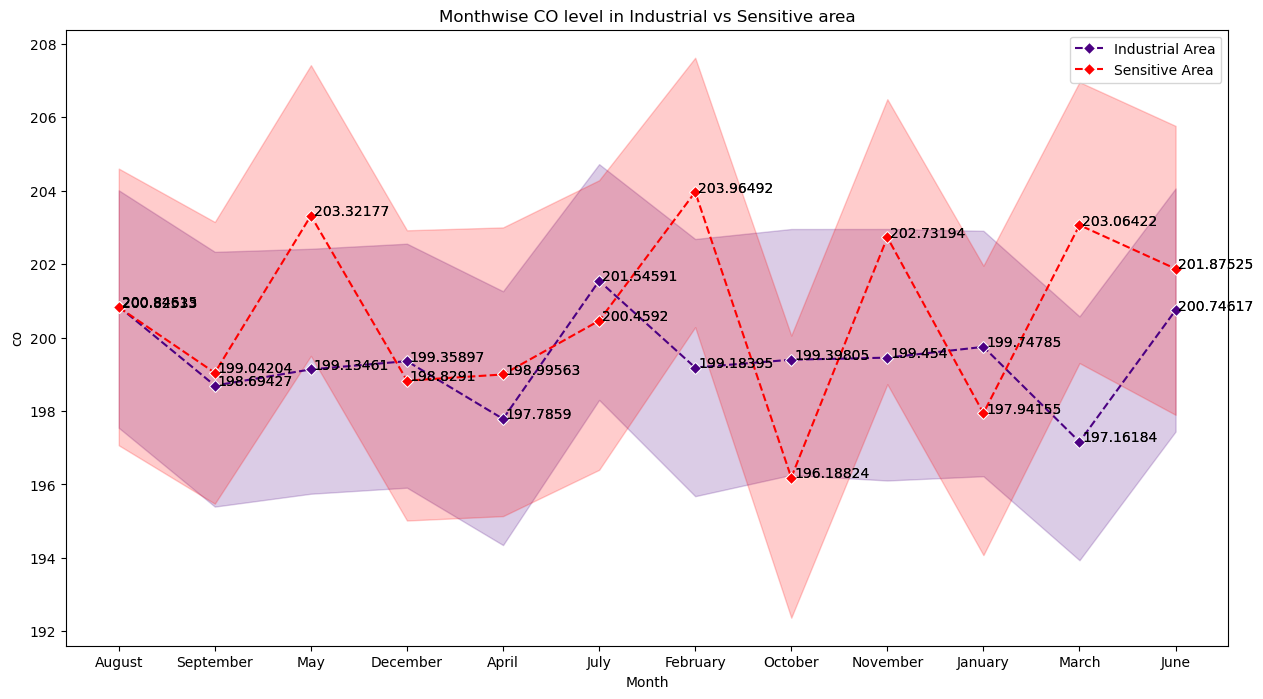

In [ ]:
# How does the co differ between industrial and sensitive areas Monthwise


plt.figure(figsize=(15,8))

s1=df[df['type']=='Industrial Area']
s2=df[df['type']=='Sensitive Area']
c1=sb.lineplot(data=s1,x='Month',y='co',marker='D',linestyle='--',color='indigo',label='Industrial Area')
c2=sb.lineplot(data=s2,x='Month',y='co',marker='D',linestyle='--',color='red',label='Sensitive Area')
for j in c1.get_lines():
    for a,b in zip(j.get_xdata(),j.get_ydata()):
        plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
    for c,d in zip(k.get_xdata(),k.get_ydata()):
        plt.text(c+0.03,d,round(d,5))
plt.legend()
plt.title('Monthwise CO level in Industrial vs Sensitive area')
plt.show()


#### 4. Comparative Analysis

Text(0.5, 1.0, 'Regionwise SO2 vs CO2 analysis before and after lockdown')

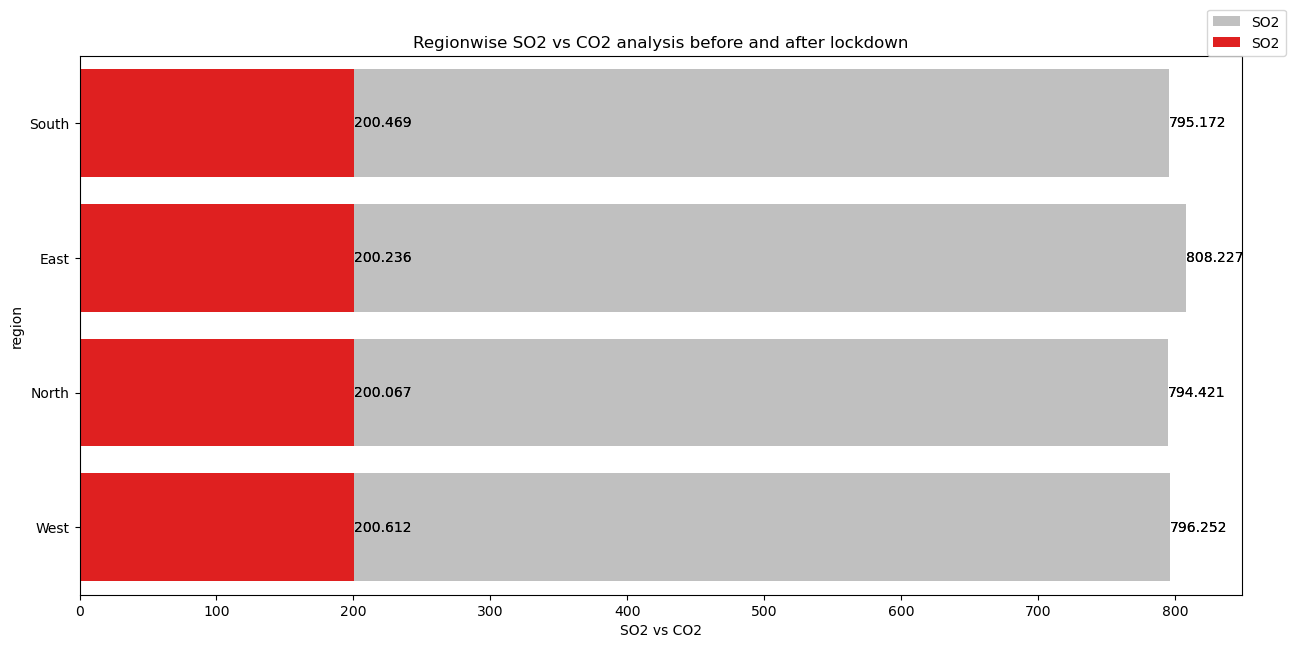

In [ ]:
# Compare pollution levels SO2 and CO before and after lockdown periods regionwise


plt.figure(figsize=(15,7))

s1=df[df['Year'].between(2020,2021)]
s2=df[~(df['Year'].between(2020,2021))]
c1=sb.barplot(data=s1,y='region',x='so2',color='silver',label='SO2',errorbar=('ci',0))
c2=sb.barplot(data=s2,y='region',x='co',color='red',label='SO2',errorbar=('ci',0))
for j in c1.containers:
    c1.bar_label(j)
for k in c2.containers:
    c2.bar_label(k)
plt.legend(loc=(0.97,1))
plt.xlabel('SO2 vs CO2')
plt.title(f'Regionwise SO2 vs CO2 analysis before and after lockdown')




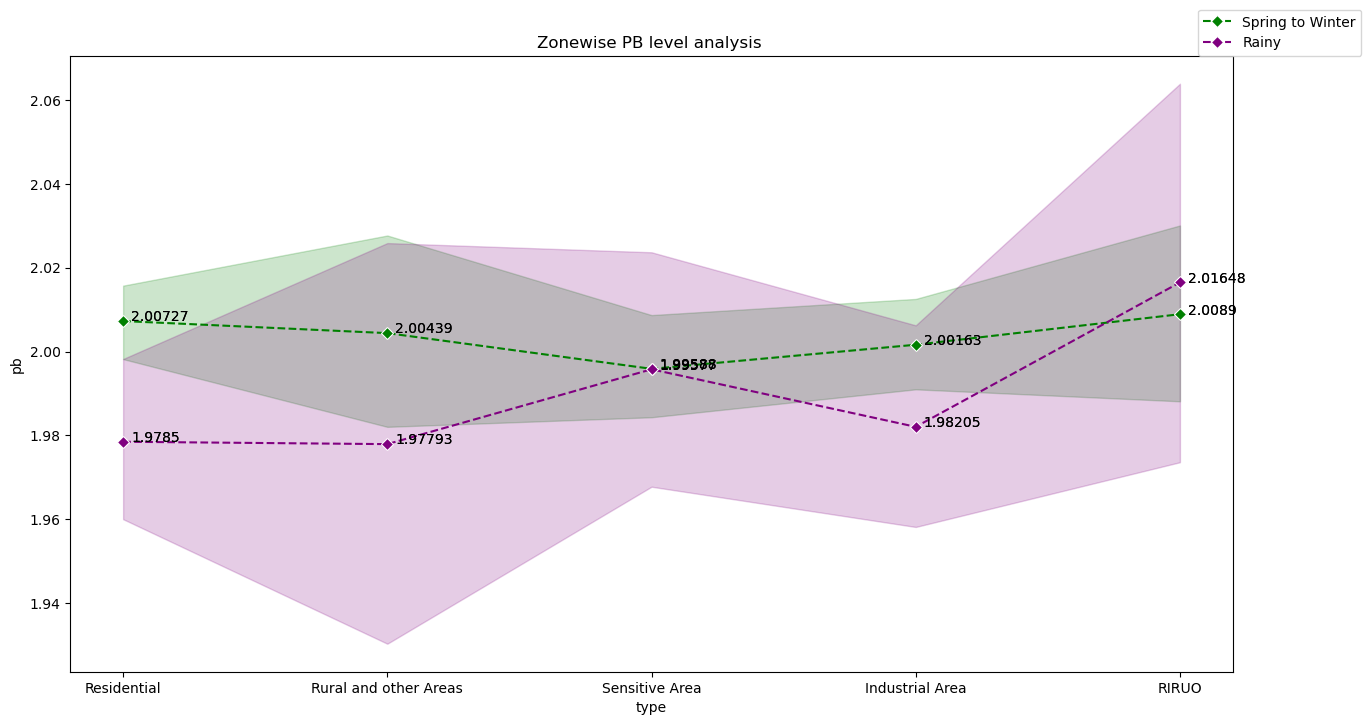

In [ ]:
# How do pb levels change during and after rainfall events zonewise

yr=list(df['Year'].unique())
yr.sort(reverse=True)

plt.figure(figsize=(15,8))

s1=df[df['Seasons'].isin(['Spring','Autumn','Summer','Winter'])]
s2=df[df['Seasons']=='Rainy']
c1=sb.lineplot(data=s1,x='type',y='pb',marker='D',linestyle='--',color='green',label='Spring to Winter')
c2=sb.lineplot(data=s2,x='type',y='pb',marker='D',linestyle='--',color='purple',label='Rainy')
for j in c1.get_lines():
    for a,b in zip(j.get_xdata(),j.get_ydata()):
        plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
    for c,d in zip(k.get_xdata(),k.get_ydata()):
        plt.text(c+0.03,d,round(d,5))
plt.title(f'Zonewise PB level analysis ')
plt.legend(loc=(0.97,1))
plt.show()

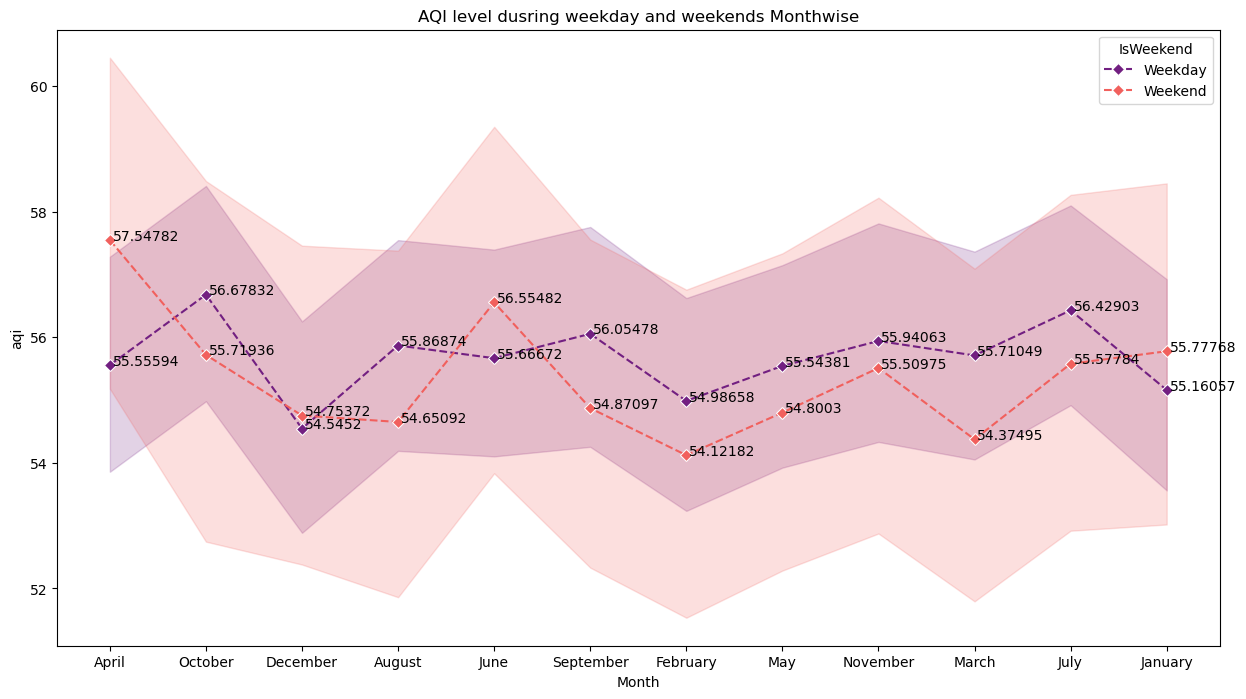

In [ ]:
# Show the difference in AQI levels between weekdays and weekends based on month

plt.figure(figsize=(15,8))

c=sb.lineplot(data=df,x='Month',y='aqi',hue='IsWeekend',marker='D',palette='magma',linestyle='--')
for j in c.get_lines():
    for a,b in zip(j.get_xdata(),j.get_ydata()):
        plt.text(a+0.03,b,round(b,5))
plt.title(f'AQI level dusring weekday and weekends Monthwise')
plt.show()

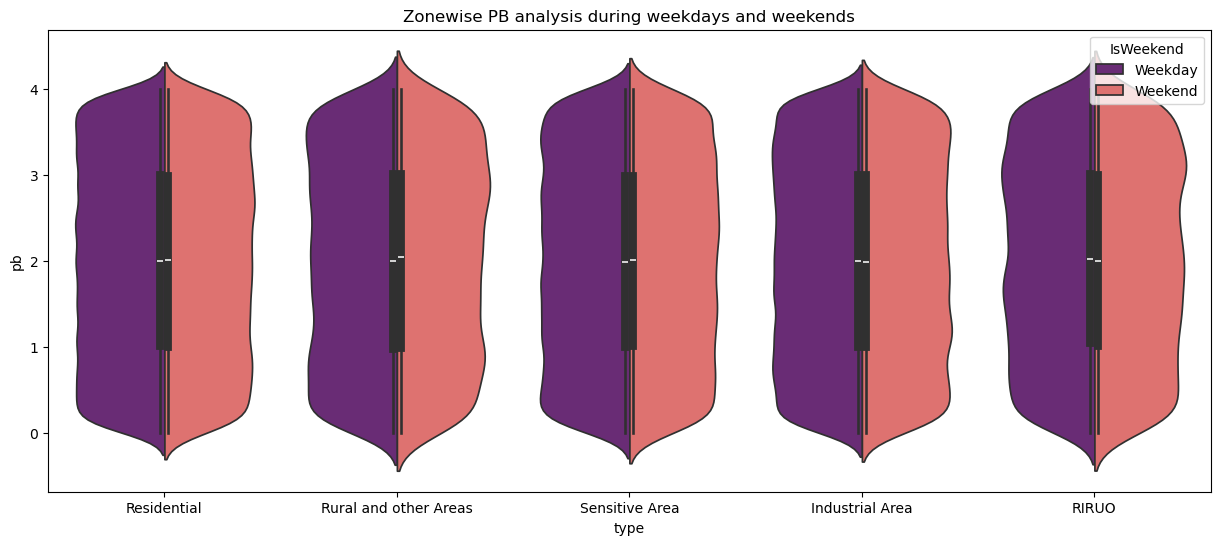

In [ ]:
# Compare PB pollution levels on weekends vs. weekdaysdays zonewise

plt.figure(figsize=(15,6))

sb.violinplot(data=df,x='type',y='pb',hue='IsWeekend',palette='magma',split=True)
plt.title('Zonewise PB analysis during weekdays and weekends')


plt.show()

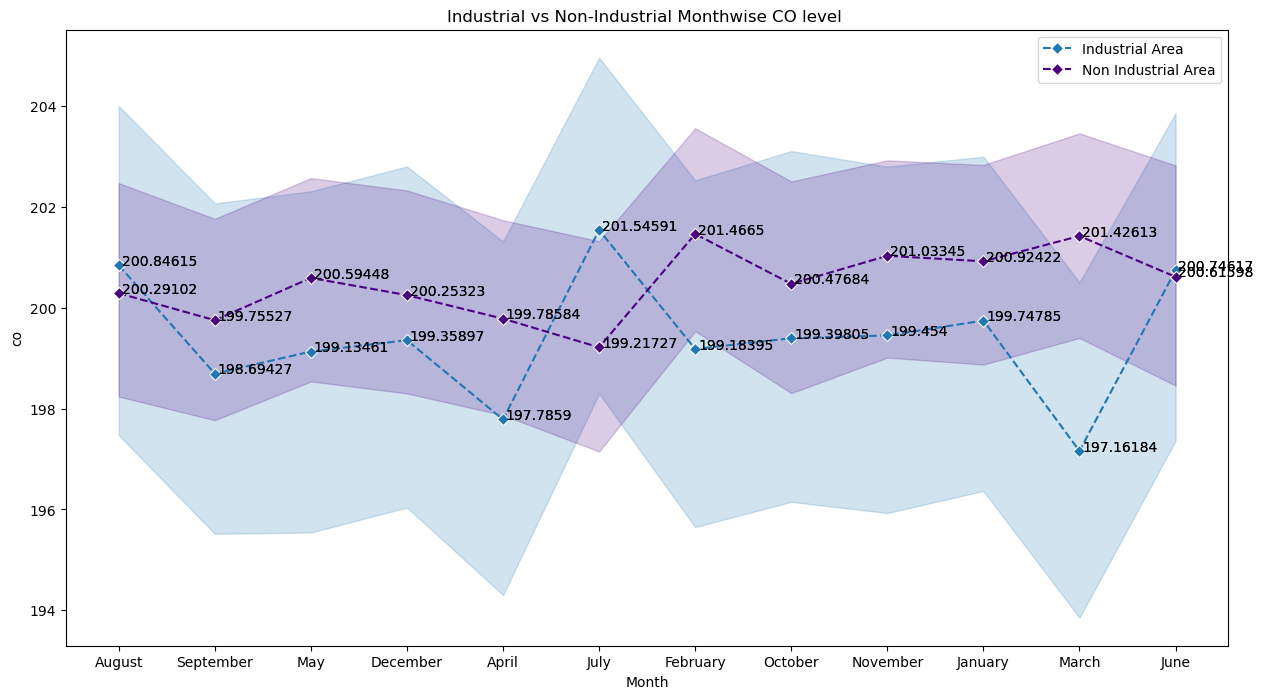

In [ ]:
# Visualize the co level difference between industrial and non-industrial regions month


plt.figure(figsize=(15,8))
s1=df[df['type']=='Industrial Area']
s2=df[df['type']!='Industrial Area']
c1=sb.lineplot(data=s1,x='Month',y='co',marker='D',linestyle='--',palette='plasma',label='Industrial Area')
c2=sb.lineplot(data=s2,x='Month',y='co',marker='D',linestyle='--',color='indigo',label='Non Industrial Area')
for j in c1.get_lines():
    for a,b in zip(j.get_xdata(),j.get_ydata()):
        plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
    for c,d in zip(k.get_xdata(),k.get_ydata()):
        plt.text(c+0.03,d,round(d,5))
plt.title(f'Industrial vs Non-Industrial Monthwise CO level ')

plt.show()


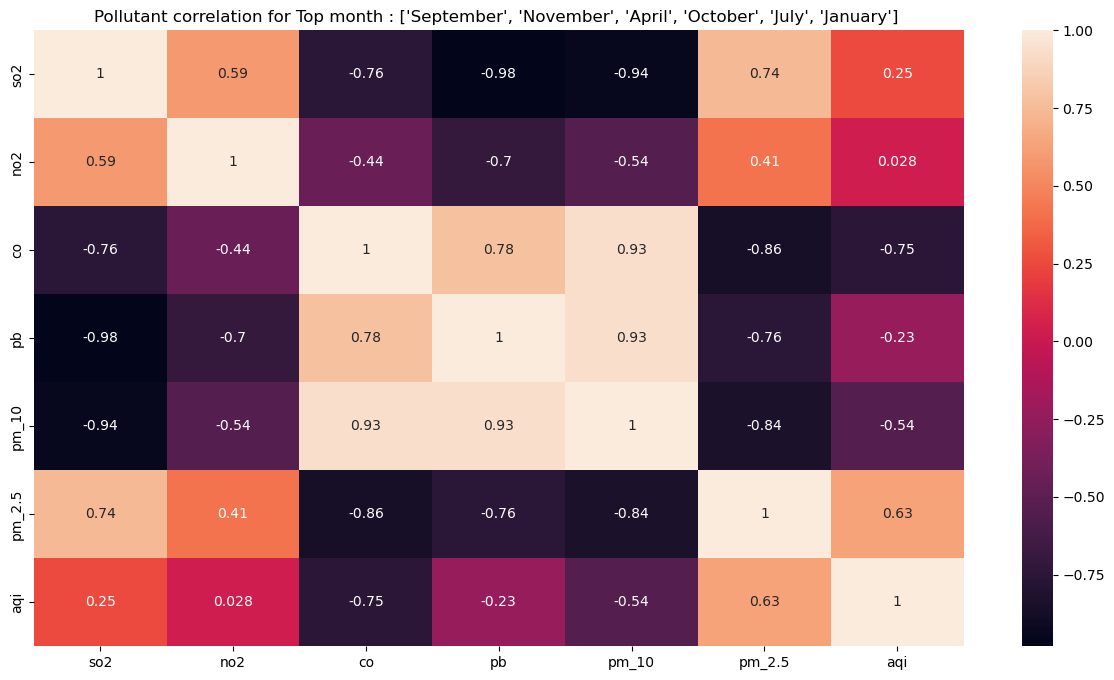

In [ ]:
# What are the top 6 months with unusual pollution levels every year

yr=list(df['Year'].unique())
yr.sort(reverse=True)
clm=['so2', 'no2', 'co', 'pb', 'pm_10', 'pm_2.5','aqi']

plt.figure(figsize=(15,8))
f=df.groupby(['Month'])[clm].mean().reset_index()
f=f.sort_values(by=clm,ascending=False).iloc[:6,:]
e=f.iloc[:,1:].corr()
sb.heatmap(e[clm].corr(),annot=True)
plt.title(f'Pollutant correlation for Top month : {f['Month'].values.tolist()} ')
plt.show()


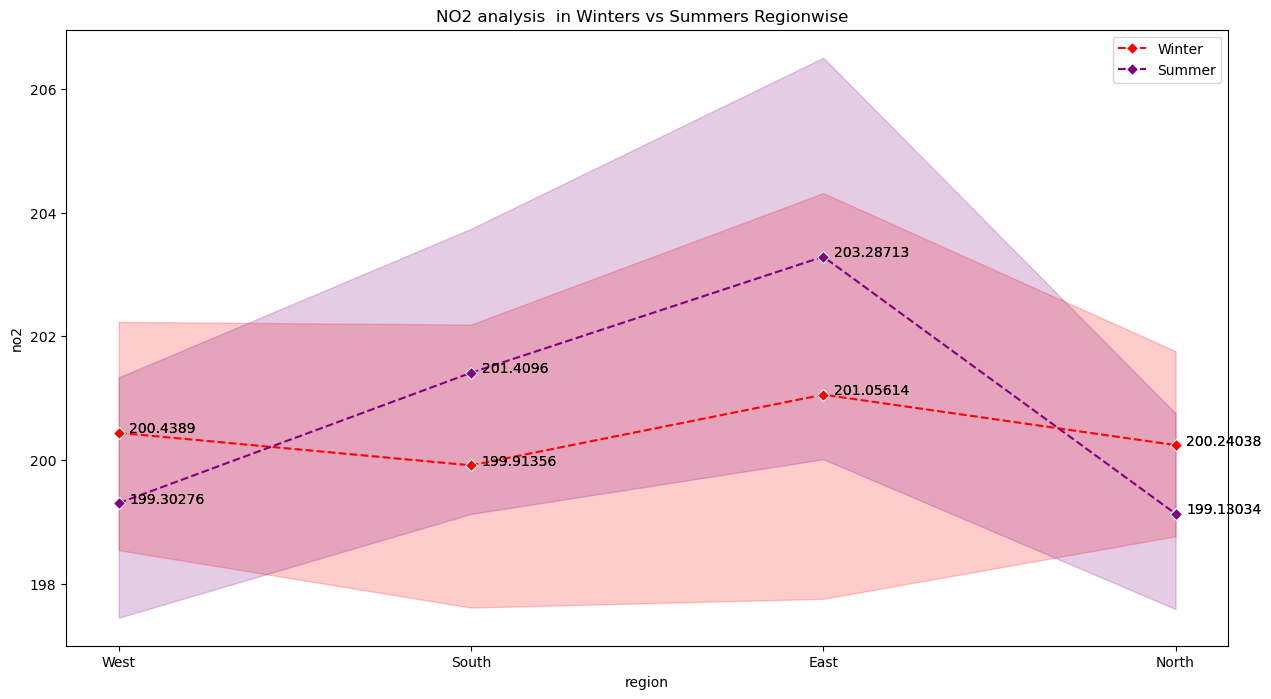

In [ ]:
# How does NO2 vary between winter and summer months Regionwise?

plt.figure(figsize=(15,8))

s1=df[df['Seasons']=='Winter']
s2=df[df['Seasons']=='Summer']
c1=sb.lineplot(data=s1,x='region',y='no2',marker='D',linestyle='--',color='red',label='Winter')
c2=sb.lineplot(data=s2,x='region',y='no2',marker='D',linestyle='--',color='purple',label='Summer')
for j in c1.get_lines():
    for a,b in zip(j.get_xdata(),j.get_ydata()):
        plt.text(a+0.03,b,round(b,5))
for k in c2.get_lines():
    for c,d in zip(k.get_xdata(),k.get_ydata()):
        plt.text(c+0.03,d,round(d,5))
plt.title(f'NO2 analysis  in Winters vs Summers Regionwise  ')

plt.show()

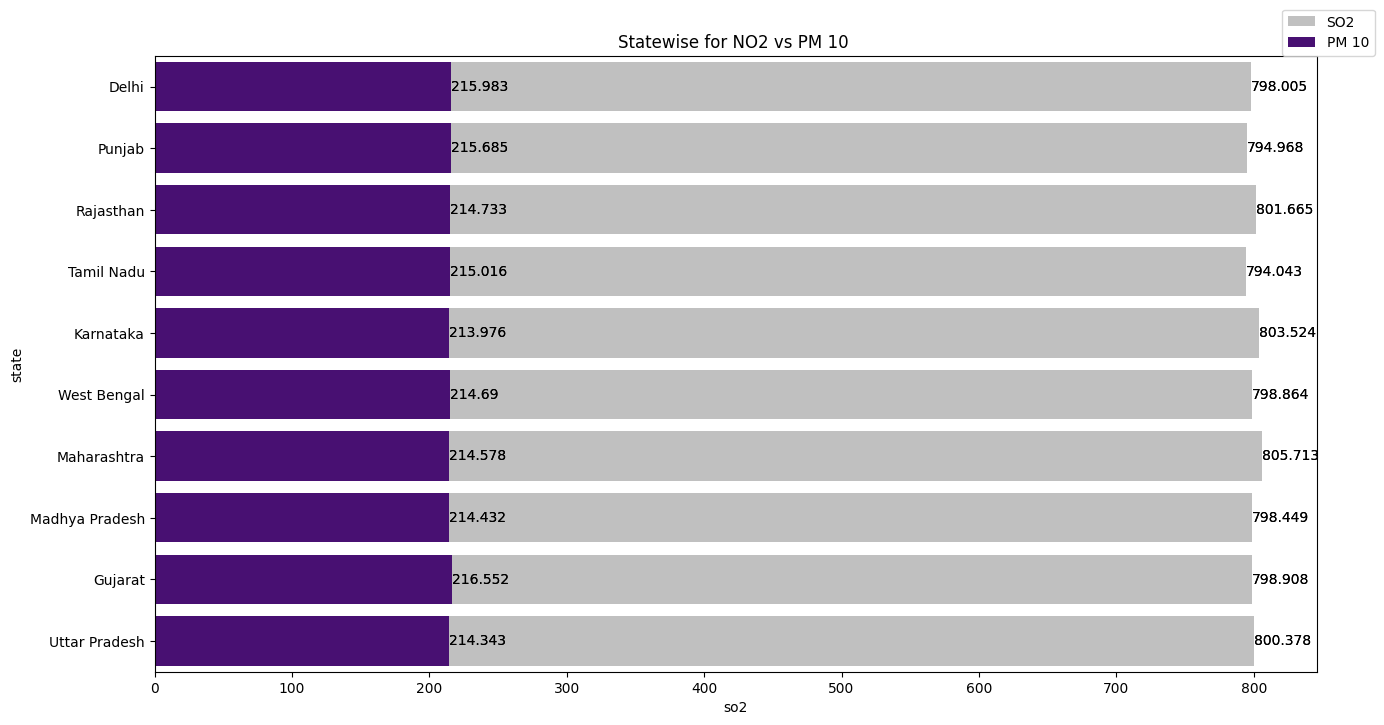

In [21]:
# Compare SO2 and PM10 pollution trends statewise.

plt.figure(figsize=(15,8))

c2=sb.barplot(data=df,x='so2',y='state',errorbar=('ci',0),color='silver',label='SO2')
c1=sb.barplot(data=df,x='pm_10',y='state',errorbar=('ci',0),color='indigo',label='PM 10')

for l in c1.containers:
    c1.bar_label(l)
for m in c2.containers:
    c2.bar_label(m)
plt.title(f'Statewise for NO2 vs PM 10 ')
plt.legend(loc=(0.97,1))

plt.show()